<img src="http://www.exalumnos.usm.cl/wp-content/uploads/2015/06/Isotipo-Negro.gif" title="Title text" width="20%" height="20%" />


<hr style="height:2px;border:none"/>
<h1 align='center'> INF-395/477 Redes Neuronales Artificiales I-2018 </h1>

<H3 align='center'> Tarea 0 - Introducción a Redes Neuronales </H3>

<hr style="height:2px;border:none"/>
<p align='center'> Alfredo Silva Celpa   201373511-8 </p>
<p align='center'> Margarita Bugueño Pérez   201373510-K </p>

**Temas**  
* NNs por dentro: *back-propagation from scratch*.
* Principales hiperparámetros de *back propagation*
* Introducción a keras
* Verificación numérica de las derivadas implementadas.

** Formalidades **  
* Equipos de trabajo de: 2 personas (*cada uno debe estar en condiciones de responder preguntas sobre cada punto del trabajo realizado*)
* Se debe preparar un (breve) Jupyter/IPython notebook que explique la actividad realizada y las conclusiones del trabajo
* Fecha de entrega: 30 de Marzo.
* Formato de entrega: envı́o de link Github al correo electrónico del ayudante (*<francisco.mena.13@sansano.usm.cl>*) , incluyendo al profesor en copia (*<jnancu@inf.utfsm.cl>*). Por favor especificar el siguiente asunto: [Tarea0-INF395-I-2018]

<hr style="height:2px;border:none"/>


#### Paquetes instalación
Para poder trabajar en el curso se necesitará instalar librerías para Python, por lo que se recomienda instalarlas a través de *anaconda* (para Windows y sistemas Unix) en un entorno virtual, donde podrán elegir su versión de Python. Se instalarán librerías como __[*sklearn*](http://scikit-learn.org/stable/)__, una librería simple y de facil acceso para *data science*, __[*keras*](https://keras.io/)__ en su versión con GPU (para cálculo acelerado a través de la tarjeta gráfica), además de que ésta utiliza como *backend* *TensorFlow* o *Theano*, por lo que habrá que instalar alguno de éstos, además de las librerías básicas de *computer science* como *numpy*, *matplotlib*, *pandas*, además de claramente *jupyter*.

* __[Descargar anacona](https://www.anaconda.com/download/#linux)__ 

* Luego de instalar Anaconda y tenerla en el *path* de su computador crear un entorno virtual: 
```
conda create -n redesneuronales python=version
```

con *version*, la version de Python que desea utilizar. Si está en Windows, se recomienda Python 3 debido a dependencias con una de las librerías a utilziar.
 
* Acceder al ambiente creado 
```
source activate redesneuronales
```

* Instalar los paquetes a utilizar
```
conda install jupyter sklearn numpy pandas matplotlib keras-gpu tensorflow-gpu 
```

* Para salir del entorno
```
source deactivate redesneuronales
```
<hr style="height:1px;border:none"/>


La tarea se divide en cuatro secciones:

[1.](#primero)   Back-propagation (BP) from *Scratch*   
[2.](#segundo)   Comparar back-propagation (BP) de Keras  
[3.](#tercero)   Verificación numérica del gradiente para una componente  
[4.](#cuarto)   Implementar momentum como variante

<a id="primero"></a>
## 1. Back-propagation (BP) from *Scratch*

BP (Back-propagation) es sin duda el paradigma dominante para entrenar redes neuronales *feed-forward*. En
redes grandes, diseñadas para problemas reales, implementar BP eficientemente puede ser una tarea delicada
que puede ser razonable delegar a una librerı́a especializada. Sin embargo, construir BP *from scratch* es muy
útil con fines pedagógicos.

$$ w^{(t+1)} \leftarrow w^{(t)} - \eta \nabla_{w^{(t)}} Loss $$
 
> a) Escriba un programa que permita entrenar una red FF con una arquitectura fija de 2 capa ocultas (con 32 neuronas en la primera capa y 16 en la segunda) y $K$ neuronas de salida, sin usar librerı́as, excepto eventualmente *numpy* para implementar operaciones básicas de algebra lineal. Por simplicidad, asuma funciones de activacion y error (*loss function*) diferenciables o subdiferenciables, además de tener la misma función de activación para las 2 capas ocultas. Adapte la arquitectura para un problema de clasificación de 3 clases, es decir la función de activación para la capa de salida debe ser **softmax** con número de neuronas $K$=3. Escriba funciones para:  
* (i)  implementar el *forward pass*  
* (ii) implementar el *backward pass*  
* (iii) implementar la rutina principal de entrenamiento, adoptando, por simplicidad, la variante cíclica aleatorizada de SGD (un ejemplo a la vez, pero iterando cíclicamente sobre una configuración aleatoria del conjunto de entrenamiento) con una tasa de aprendizaje fija de 0.1 y número de ciclos fijos (*epochs*).



In [16]:
import numpy as np

#Algunas constantes que se usaran en las funciones
epsilon=1e-15
epsilon_gigantes=600
x_muy_grande=600
#constante para aproximar RELU
K=0.8

def sigmoidal(x):
    if (x>0):
        x = np.maximum(epsilon,x)
        return 1/(1+ np.exp(-x))
    elif(x<0):
        x = np.maximum(-600,x)
        return 1/(1+ np.exp(-x))
    else:
        return 1/(1+ np.exp(-(epsilon)))

def d_sigmoidal(x):
    return sigmoidal(x)*(1-sigmoidal(x))

def relu(x):#probar sin los trukillos
    x_aux=np.minimum(x,x_muy_grande)
    return (1/(2*K))*np.log(1+np.exp(2*K*x_aux))

def d_relu(x):#probar sin los trikullos
    x_aux=np.minimum(x,x_muy_grande)
    return np.exp(2*K*x_aux)/(np.exp(2*K*x_aux)+1)
    

def softmax(x): #Se utiliza la aproximacion de keras
    b=np.max(x)
    e=np.exp(x-b)
    return e/np.sum(e)

def softmaxcomp(x,i):#i={0,1,2}
    b = np.max(x)
    e = np.exp(x-b)
    v = e/np.sum(e)
    return v[i]

def d_softmax(x):
    return softmax(x)*(np.subtract(1,softmax(x)))

def d_softmax_comp(x,i):# RECORDAR: Devuelve un vector de softmax
    v=[0,0,0]
    for j in range(3):
        if i==j:
            v[i] = softmaxcomp(x,i)*(np.subtract(1,softmaxcomp(x,i)))
        else:
            v[j] = -softmaxcomp(x,j)*softmaxcomp(x,i)
    return v

def error_mse(ytrue, ypred):
    return (0.5)*((np.subtract(ytrue,ypred))**2)

def d_error_mse(ytrue, ypred):
    return (np.subtract(ytrue,ypred))

def error_CE(ytrue,ypred):
    vector_retorno=[]
    for i in range(len(ytrue)):
        aux = np.maximum(ypred[i],epsilon) 
        temp=-(ytrue[i]*np.log(aux))
        vector_retorno.append(temp)
    return vector_retorno

def d_error_CE(ytrue,ypred):
    vector_retorno=[]
    for i in range(len(ytrue)):
        aux = np.maximum(ypred[i],epsilon)
        temp = -ytrue[i]/aux
        vector_retorno.append(temp)
    return vector_retorno


#definicion del modelo y su arquitectura
#total capas= capas ocultas + capa de salida
def size_layers(total_capas,input_size,n_capa_o1, n_capa_o2, n_capa_out):
    sizes=np.arange(total_capas+1)
    sizes[0]=input_size
    sizes[1]=n_capa_o1
    sizes[2]=n_capa_o2    
    sizes[3]=n_capa_out
    return sizes

def iniciar_estructuras(total_capas,tamanios_arquit):
    salida_l=[]
    da_salida_l=[]
    e_salida_l=[]
    for i in np.arange(total_capas+1):        
        if i<total_capas:
            salida_l.append(np.zeros(tamanios_arquit[i+1]))
        else: 
            salida_l.append(np.zeros(tamanios_arquit[0]))
            
    da_salida_l=salida_l.copy()
    e_salida_l=salida_l.copy()
    m_pesos=[]
    for i in np.arange(total_capas):
        m_pesos.append(np.random.rand(tamanios_arquit[i],tamanios_arquit[i+1]))
    e_m_pesos=[]
    for i in np.arange(total_capas):
        e_m_pesos.append(np.zeros((tamanios_arquit[i],tamanios_arquit[i+1])))  
    momentums=[]
    for i in np.arange(total_capas):
        momentums.append(np.zeros((tamanios_arquit[i],tamanios_arquit[i+1])))
      
    return salida_l, da_salida_l, e_salida_l, m_pesos, e_m_pesos, momentums  

def one_hot(posicion):
    array=np.zeros(3)
    array[posicion]=1
    return array


In [4]:
def vector2hot(vector):
    array=np.zeros(len(vector))
    posicion=np.argmax(vector)
    array[posicion]=1.0
    return array

In [5]:
def forwarding(total_capas, vector_x, salida_l, da_salida_l,m_pesos, vector_arquit, f_activ, arg):
    vector=vector_x.copy() 
    salida_l[-1]=vector.copy()
    da_salida_l[-1]=vector.copy()
    
    for capa in range(total_capas-1):
        salida_capa=[]
        d_salida_capa=[]

        for neurona in range(vector_arquit[capa+1]):
            #pesos como vector columna de m_pesos
            w=(m_pesos[capa].T[neurona]).copy() #vector pesos hacia neurona desde las xs inputs (vector dimesion entrada a capa)
            temp= np.dot(vector,w)
            
            if f_activ=="sigmoid":
                temp1=sigmoidal(temp)
                temp2=d_sigmoidal(temp)
                salida_capa.append(temp1)
                d_salida_capa.append(temp2)
                
            else: 
                temp1=relu(temp)
                temp2=d_relu(temp)
                salida_capa.append(temp1)
                d_salida_capa.append(temp2)
        salida_l[capa]=salida_capa.copy()
        da_salida_l[capa]=d_salida_capa.copy()
        vector=salida_capa.copy()
    salida_last_t=[]
    d_salida_last=[] 
    
    for neurona in range(vector_arquit[-1]):
        w=(m_pesos[-1].T[neurona]).copy() #vector pesos entre ult. capa oculta y la capa out (dimesion largo de capa anterior)
        temp= np.dot(vector,w) #elemento i-esimo entrada a softmax (de la salida de la capa)
        salida_last_t.append(temp)   
        
    salida_last=softmax(salida_last_t)
    d_salida_last=d_softmax_comp(salida_last_t,arg)
    salida_l[-2]=salida_last.copy()
    da_salida_l[-2]=d_salida_last.copy()
    vector=salida_last.copy()
    return vector

In [17]:
def backwarding(total_capas, vector_x, vector_y, tipo_error ,tasa, salida_l, da_salida_l,e_salida_l,m_pesos, vector_arquit,e_m_pesos):

    if tipo_error=="mse":
        error_EA=np.sum(d_error_mse(vector_y,salida_l[-2]))
        
    else:
        error_EA=d_error_CE(vector_y,salida_l[-2])
        #print("Error EA: ", error_EA)
        error_EA = np.sum(error_EA)
    
    m_pesos_copia = m_pesos.copy()    
    for neurona_final in range(vector_arquit[-1]):
        error_EW_n=error_EA*da_salida_l[-2][neurona_final]*np.array(salida_l[-3])        
        e_m_pesos_T=e_m_pesos[total_capas-1].T.copy()
        e_m_pesos_T[neurona_final]=error_EW_n.copy()
        e_m_pesos[total_capas-1] = e_m_pesos_T.T.copy()
        pesos_auxiliar=m_pesos[total_capas-1].T.copy()
        pesos_auxiliar[neurona_final]= pesos_auxiliar[neurona_final].copy()-(tasa*error_EW_n)
        m_pesos[total_capas-1]=pesos_auxiliar.T.copy()
        
    e_salida_l[total_capas-1]=error_EA.copy()      
    for capa in np.arange(total_capas-2,-1,-1): 
        error_aux=[]
        pesos_auxiliar2=m_pesos[capa].T.copy() 
        for neurona in range(vector_arquit[capa+1]):
            #error_EA_s=np.sum(e_salida_l[capa+1]*da_salida_l[capa][neurona]*m_pesos_copia[capa].T[neurona] ) 
            error_EA_s=np.sum(e_salida_l[capa+1]*np.array(da_salida_l[capa+1])*m_pesos_copia[capa+1][neurona]) 
            #print("Capa: ", capa," Neurona", neurona)
            #print("error salida l: ", e_salida_l[capa+1])
            #print("da_salida_l: ", np.array(da_salida_l[capa+1]))
            #print("Error EA_s: ", error_EA_s)
            error_EW_s=error_EA_s*da_salida_l[capa][neurona]*np.array(salida_l[capa-1])            
            e_m_pesos[capa].T[neurona]=error_EW_s.copy()
            arreglo=(pesos_auxiliar2[neurona]-(tasa*error_EW_s)).copy() 
            pesos_auxiliar2[neurona]=arreglo.copy() 
            m_pesos[capa]=(pesos_auxiliar2.T).copy()
            error_aux.append(error_EA_s.copy())
        e_salida_l[capa]=error_aux.copy()

    return m_pesos,e_m_pesos

In [7]:
def shuffling(X_train,y_onehot):
    concatenados = []
    y_onehot_shuffled=[]
    X_train_shuffled=[]
    
    for i in range(X_train.shape[0]):
        concatenados.append((X_train[i], y_onehot[i]))
        
    np.random.shuffle(concatenados)
    
    for i in range(len(concatenados)):
        X_train_shu,y_onehot_shu = concatenados[i]
        y_onehot_shuffled.append(y_onehot_shu)
        X_train_shuffled.append(X_train_shu)
        
    return X_train_shuffled,y_onehot_shuffled

In [19]:
class NN_2ocultas:
    def __init__(self, total_capas, tamanios_arquit):
        self.n_capa_in=tamanios_arquit[0]
        self.n_capa_1=tamanios_arquit[1]
        self.n_capa_2=tamanios_arquit[2]
        self.n_capa_out=tamanios_arquit[3]
        self.total_capas=total_capas
        self.salidas_l, self.da_salida_l, self.e_salida_l, self.m_pesos, self.e_m_pesos, self.momentums=iniciar_estructuras(total_capas,tamanios_arquit)

    def training(self, Xtrain, Ytrain, epoch, error, f_activ, tasa, tipo_back, reinit, mu):
        t=size_layers(self.total_capas,self.n_capa_in,self.n_capa_1, self.n_capa_2, self.n_capa_out)
        arg = np.argmax(Ytrain)
        y_pred=forwarding(self.total_capas, Xtrain, self.salidas_l, self.da_salida_l,self.m_pesos, t, f_activ,arg)

        if(error=="mse"):
            v_e = error_mse(Ytrain, y_pred)
            E = np.sum(v_e)/len(v_e)
            vector_hot=vector2hot(y_pred)
            acc = np.dot(vector_hot,Ytrain)
        else:
            #print("ypred",y_pred)
            #print("ytrain",Ytrain)
            v_e = error_CE(Ytrain , y_pred)
            E = np.sum(v_e)
            vector_hot=vector2hot(y_pred)
            acc = np.dot(vector_hot,Ytrain)
        if tipo_back=="grad":
            self.m_pesos,self.e_m_pesos = backwarding(self.total_capas, Xtrain, Ytrain, error , tasa, 
                                                      self.salidas_l, self.da_salida_l,self.e_salida_l,
                                                      self.m_pesos, t,self.e_m_pesos)
        else:
            self.m_pesos,self.e_m_pesos = backwarding_momentum(self.total_capas, Xtrain, Ytrain, error , tasa, 
                                                               self.salidas_l, self.da_salida_l,self.e_salida_l,
                                                               self.m_pesos, t,self.e_m_pesos, mu, self.momentums)
        return E,acc
    
    
    def entrenamiento(self,tamanios_arquit,Xtrain,Ytrain, f_activ, tasa,loss, tipo_back, reinit, mu):
        errores=[]
        acc_epoch=[]
        for i in range(100):
            X_t,Y_t = shuffling(Xtrain,Ytrain)
            print("Epoch: ",i)
            acc_batch=[]
            err_batch=[]
            if reinit==1:
                momentums=[]
                for i in np.arange(self.total_capas):
                    momentums.append(np.zeros((tamanios_arquit[i],tamanios_arquit[i+1])))
                self.momentums=momentums.copy()
            for j in range(len(X_t)):
                #print ("EJEMPLO : ", X_t[j],Y_t[j])
                error,acc=self.training(X_t[j],Y_t[j],1,loss, f_activ, tasa, tipo_back, reinit, mu) 
                acc_batch.append(acc)
                err_batch.append(error)
            acc_epoch.append(acc_batch)
            errores.append(err_batch)
        return errores,acc_epoch

> b) Escriba una función que permita hacer predicciones mediante la red FF definida anteriormente, sin usar librerı́as, excepto eventualmente *numpy*. Escriba una función vectorizada que implemente el forward pass sobre un conjunto de $n_{t}$ ejemplos, además de implementar la función de decisión, que a través de la salida de la red prediga el valor categórico de la clase (1, 2 o 3).



In [9]:
def prediccion(redN,df_x,df_y,vector_arquit):
    vector_clase=[]
    for ejemplo in range(df_x.shape[0]):
        vector_x=df_x[ejemplo]
        temp_retorno=forwarding(redN.total_capas, vector_x, redN.salidas_l, redN.da_salida_l,redN.m_pesos, vector_arquit)
        vector_clase.append(temp_retorno)
    return vector_clase

def clase_vector(array_vector):
    to_return=[]
    for arreglo in array_vector:
        aux=np.argmax(a)+1
        to_return.append(aux)
    return to_return
        

> c) Demuestre que sus programas funcionan en un problema de clasificación. Para esto utilice el dataset **iris**, disponible a través de la librería __[*sklearn*](http://scikit-learn.org)__, el cual corresponde a la clasificación de distintos tipos de plantas de iris (3 clases) mediante 4 características reales continuas específicas de la planta, deberá entrenar (ajustar) los pesos de la red para realizar la tarea encomendada, variando las funciones de error (*loss*) entre *categorical cross entropy* y *mean squared error*, además de variar las funciones de activación para las 2 capas ocultas entre  ReLU (Rectifier Linear Unit) y la función logística (*sigmoid*). Especifique explícitamente las funciones anteriores, así como sus gradientes. Recuerde que debe transformar las etiquetas usando *one hot vectors*.
<div class="alert alert-block alert-info">Es una buena práctica el normalizar los datos antes de trabajar con el modelo</div>
```python
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_iris
X_train,y_train = load_iris(return_X_y=True)
scaler = StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)
#transform target to one hot vector
import keras
y_onehot = keras.utils.to_categorical(y_train)
```
Para evaluar los resultados, construya un gráfico correspondiente al error de clasificación versus número
de epochs, utilizando sólo el conjunto de entrenamiento (el objetivo de esta sección es familiarizarse
con el algoritmo BP, no encontrar la mejor red). Grafique también la evolución de la función objetivo utilizada para el entrenamiento. Además de reportar el tiempo de entrenamiento mediante el algoritmo implementado.  
Por último, para alguna configuración elegida, reporte la matriz de confusión mediante el uso de librerías como *sklearn* o *keras*.

In [10]:
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_iris
X_train,y_train = load_iris(return_X_y=True)
scaler = StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)
import keras
y_onehot = keras.utils.to_categorical(y_train)


Using TensorFlow backend.


In [35]:
arquitectura=size_layers(3,4,32,16,3) #(3,4,32,16,3)
modelo=NN_2ocultas(3, arquitectura)
#print ("MPESOS ORIGINAL",modelo.m_pesos)
#print (X_train.shape[0])
errores,accs = modelo.entrenamiento(arquitectura,X_train,y_onehot, "sigmoid", 0.1,"ce", "grad",0, 0.1) 
promerr=[]
promacc=[]
#calculo de los promedios por epoch
for i in range(len(errores)):
    prome=np.mean(errores[i])
    proma=np.mean(accs[i])
    promerr.append(prome)
    promacc.append(proma)


Epoch:  0
Epoch:  1
Epoch:  2
Epoch:  3
Epoch:  4
Epoch:  5
Epoch:  6
Epoch:  7
Epoch:  8
Epoch:  9
Epoch:  10
Epoch:  11
Epoch:  12
Epoch:  13
Epoch:  14
Epoch:  15
Epoch:  16
Epoch:  17
Epoch:  18
Epoch:  19
Epoch:  20
Epoch:  21
Epoch:  22
Epoch:  23
Epoch:  24
Epoch:  25
Epoch:  26
Epoch:  27
Epoch:  28
Epoch:  29
Epoch:  30
Epoch:  31
Epoch:  32
Epoch:  33
Epoch:  34
Epoch:  35
Epoch:  36
Epoch:  37
Epoch:  38
Epoch:  39
Epoch:  40
Epoch:  41
Epoch:  42
Epoch:  43
Epoch:  44
Epoch:  45
Epoch:  46
Epoch:  47
Epoch:  48
Epoch:  49
Epoch:  50
Epoch:  51
Epoch:  52
Epoch:  53
Epoch:  54
Epoch:  55
Epoch:  56
Epoch:  57
Epoch:  58
Epoch:  59
Epoch:  60
Epoch:  61
Epoch:  62
Epoch:  63
Epoch:  64
Epoch:  65
Epoch:  66
Epoch:  67
Epoch:  68
Epoch:  69
Epoch:  70
Epoch:  71
Epoch:  72
Epoch:  73
Epoch:  74
Epoch:  75
Epoch:  76
Epoch:  77
Epoch:  78
Epoch:  79
Epoch:  80
Epoch:  81
Epoch:  82
Epoch:  83
Epoch:  84
Epoch:  85
Epoch:  86
Epoch:  87
Epoch:  88
Epoch:  89
Epoch:  90
Epoch:  9

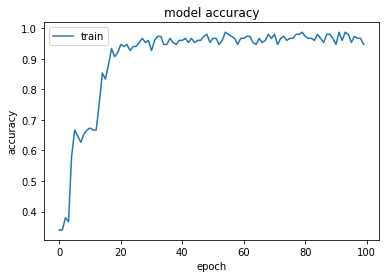

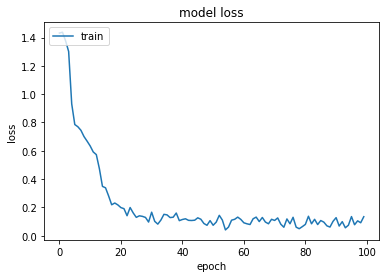

In [36]:
# Grafico para el accuracy
import matplotlib.pyplot as plt
plt.plot(promacc)
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper left')
plt.show()

# Grafico para el Loss
plt.plot(promerr)
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper left')
plt.show()

In [15]:
arquitectura=size_layers(3,4,32,16,3) #(3,4,32,16,3)
modelo=NN_2ocultas(3, arquitectura)
#print ("MPESOS ORIGINAL",modelo.m_pesos)
#print (X_train.shape[0])
errores,accs = modelo.entrenamiento(arquitectura,X_train,y_onehot, "relu", 0.1,"ce", "grad",0, 0.1) 
promerr=[]
promacc=[]
#calculo de los promedios por epoch
for i in range(len(errores)):
    prome=np.mean(errores[i])
    proma=np.mean(accs[i])
    promerr.append(prome)
    promacc.append(proma)


Epoch:  0
ypred [  9.99999916e-01   1.91319802e-12   8.43176949e-08]
ytrain [ 0.  0.  1.]
Error EA:  [-0.0, -0.0, -11859906.769304303]
Capa:  1  Neurona 0
error salida l:  -11859906.7693
da_salida_l:  [ -8.43176877e-08  -1.61316447e-19   8.43176877e-08]
Error EA_s:  0.312752571255
Capa:  1  Neurona 1
error salida l:  -11859906.7693
da_salida_l:  [ -8.43176877e-08  -1.61316447e-19   8.43176877e-08]
Error EA_s:  0.105050550627
Capa:  1  Neurona 2
error salida l:  -11859906.7693
da_salida_l:  [ -8.43176877e-08  -1.61316447e-19   8.43176877e-08]
Error EA_s:  -0.47045280534
Capa:  1  Neurona 3
error salida l:  -11859906.7693
da_salida_l:  [ -8.43176877e-08  -1.61316447e-19   8.43176877e-08]
Error EA_s:  0.179330302299
Capa:  1  Neurona 4
error salida l:  -11859906.7693
da_salida_l:  [ -8.43176877e-08  -1.61316447e-19   8.43176877e-08]
Error EA_s:  -0.155184625757
Capa:  1  Neurona 5
error salida l:  -11859906.7693
da_salida_l:  [ -8.43176877e-08  -1.61316447e-19   8.43176877e-08]
Error EA_s

error salida l:  -1e+15
da_salida_l:  [-0.  0. -0.]
Error EA_s:  0.0
Capa:  1  Neurona 1
error salida l:  -1e+15
da_salida_l:  [-0.  0. -0.]
Error EA_s:  0.0
Capa:  1  Neurona 2
error salida l:  -1e+15
da_salida_l:  [-0.  0. -0.]
Error EA_s:  0.0
Capa:  1  Neurona 3
error salida l:  -1e+15
da_salida_l:  [-0.  0. -0.]
Error EA_s:  0.0
Capa:  1  Neurona 4
error salida l:  -1e+15
da_salida_l:  [-0.  0. -0.]
Error EA_s:  0.0
Capa:  1  Neurona 5
error salida l:  -1e+15
da_salida_l:  [-0.  0. -0.]
Error EA_s:  0.0
Capa:  1  Neurona 6
error salida l:  -1e+15
da_salida_l:  [-0.  0. -0.]
Error EA_s:  0.0
Capa:  1  Neurona 7
error salida l:  -1e+15
da_salida_l:  [-0.  0. -0.]
Error EA_s:  0.0
Capa:  1  Neurona 8
error salida l:  -1e+15
da_salida_l:  [-0.  0. -0.]
Error EA_s:  0.0
Capa:  1  Neurona 9
error salida l:  -1e+15
da_salida_l:  [-0.  0. -0.]
Error EA_s:  0.0
Capa:  1  Neurona 10
error salida l:  -1e+15
da_salida_l:  [-0.  0. -0.]
Error EA_s:  0.0
Capa:  1  Neurona 11
error salida l:  -1

  0.99937274  0.99322524  0.99508177  0.99993225]
Error EA_s:  8.97261022148e-149
Capa:  0  Neurona 27
error salida l:  [1.2220584897470614e-149, 1.5835783327281246e-149, 1.3116933767508664e-149, 1.5479398748995353e-149, 1.5115188799052608e-149, 1.3467704617777358e-149, 1.3701291343167291e-149, 1.4792562029701439e-149, 1.5651101747149596e-149, 9.1115631357359267e-150, 1.4757924200333148e-149, 8.0481917855319516e-150, 1.2399560791470074e-149, 1.0792985752724728e-149, 1.2913156498741125e-149, 1.3046178704855076e-149]
da_salida_l:  [ 0.99646366  0.99923899  0.99954491  0.99971904  0.99894634  0.99968391
  0.99519074  0.99860643  0.99962581  0.99803332  0.99990581  0.96844964
  0.99937274  0.99322524  0.99508177  0.99993225]
Error EA_s:  8.18631892618e-149
Capa:  0  Neurona 28
error salida l:  [1.2220584897470614e-149, 1.5835783327281246e-149, 1.3116933767508664e-149, 1.5479398748995353e-149, 1.5115188799052608e-149, 1.3467704617777358e-149, 1.3701291343167291e-149, 1.4792562029701439e-149

da_salida_l:  [  1.85297486e-207  -7.49063808e-312  -1.85297486e-207]
Error EA_s:  1.18517424389e-191
Capa:  1  Neurona 5
error salida l:  -1e+15
da_salida_l:  [  1.85297486e-207  -7.49063808e-312  -1.85297486e-207]
Error EA_s:  1.27031340701e-191
Capa:  1  Neurona 6
error salida l:  -1e+15
da_salida_l:  [  1.85297486e-207  -7.49063808e-312  -1.85297486e-207]
Error EA_s:  1.21005207906e-191
Capa:  1  Neurona 7
error salida l:  -1e+15
da_salida_l:  [  1.85297486e-207  -7.49063808e-312  -1.85297486e-207]
Error EA_s:  1.36053011799e-191
Capa:  1  Neurona 8
error salida l:  -1e+15
da_salida_l:  [  1.85297486e-207  -7.49063808e-312  -1.85297486e-207]
Error EA_s:  1.28722587251e-191
Capa:  1  Neurona 9
error salida l:  -1e+15
da_salida_l:  [  1.85297486e-207  -7.49063808e-312  -1.85297486e-207]
Error EA_s:  1.08642576728e-191
Capa:  1  Neurona 10
error salida l:  -1e+15
da_salida_l:  [  1.85297486e-207  -7.49063808e-312  -1.85297486e-207]
Error EA_s:  1.35894295679e-191
Capa:  1  Neurona 11


Capa:  1  Neurona 7
error salida l:  -1e+15
da_salida_l:  [ 0. -0. -0.]
Error EA_s:  0.0
Capa:  1  Neurona 8
error salida l:  -1e+15
da_salida_l:  [ 0. -0. -0.]
Error EA_s:  0.0
Capa:  1  Neurona 9
error salida l:  -1e+15
da_salida_l:  [ 0. -0. -0.]
Error EA_s:  0.0
Capa:  1  Neurona 10
error salida l:  -1e+15
da_salida_l:  [ 0. -0. -0.]
Error EA_s:  0.0
Capa:  1  Neurona 11
error salida l:  -1e+15
da_salida_l:  [ 0. -0. -0.]
Error EA_s:  0.0
Capa:  1  Neurona 12
error salida l:  -1e+15
da_salida_l:  [ 0. -0. -0.]
Error EA_s:  0.0
Capa:  1  Neurona 13
error salida l:  -1e+15
da_salida_l:  [ 0. -0. -0.]
Error EA_s:  0.0
Capa:  1  Neurona 14
error salida l:  -1e+15
da_salida_l:  [ 0. -0. -0.]
Error EA_s:  0.0
Capa:  1  Neurona 15
error salida l:  -1e+15
da_salida_l:  [ 0. -0. -0.]
Error EA_s:  0.0
Capa:  0  Neurona 0
error salida l:  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
da_salida_l:  [ 0.99999973  0.99999999  1.          0.99999999  0.99999998 

Capa:  1  Neurona 10
error salida l:  -1e+15
da_salida_l:  [ -7.77617510e-249   5.37629273e-084  -5.37629273e-084]
Error EA_s:  2.03376502336e-68
Capa:  1  Neurona 11
error salida l:  -1e+15
da_salida_l:  [ -7.77617510e-249   5.37629273e-084  -5.37629273e-084]
Error EA_s:  1.10910794313e-68
Capa:  1  Neurona 12
error salida l:  -1e+15
da_salida_l:  [ -7.77617510e-249   5.37629273e-084  -5.37629273e-084]
Error EA_s:  1.70876287887e-68
Capa:  1  Neurona 13
error salida l:  -1e+15
da_salida_l:  [ -7.77617510e-249   5.37629273e-084  -5.37629273e-084]
Error EA_s:  1.48736344106e-68
Capa:  1  Neurona 14
error salida l:  -1e+15
da_salida_l:  [ -7.77617510e-249   5.37629273e-084  -5.37629273e-084]
Error EA_s:  1.77954065029e-68
Capa:  1  Neurona 15
error salida l:  -1e+15
da_salida_l:  [ -7.77617510e-249   5.37629273e-084  -5.37629273e-084]
Error EA_s:  1.79787221958e-68
Capa:  0  Neurona 0
error salida l:  [1.6840985081721292e-68, 2.1823029994850175e-68, 1.8076228572517955e-68, 2.133190232652

da_salida_l:  [ 0.99753233  0.99948493  0.99964263  0.99978274  0.99926145  0.99980622
  0.99635397  0.99900525  0.99975414  0.9986618   0.9999382   0.97316851
  0.99958217  0.99475981  0.99670526  0.99995337]
Error EA_s:  7.33035793501e-157
Capa:  0  Neurona 13
error salida l:  [7.191599103378559e-158, 9.3190797439936351e-158, 7.7190846357129614e-158, 9.109353692813447e-158, 8.8950225481567036e-158, 7.9255071067688094e-158, 8.0629687830281087e-158, 8.7051623733239886e-158, 9.210397884882277e-158, 5.3619945221196568e-158, 8.6847786204416248e-158, 4.7362192001652883e-158, 7.2969232666335673e-158, 6.3514821355349422e-158, 7.5991652999648921e-158, 7.6774465267837917e-158]
da_salida_l:  [ 0.99753233  0.99948493  0.99964263  0.99978274  0.99926145  0.99980622
  0.99635397  0.99900525  0.99975414  0.9986618   0.9999382   0.97316851
  0.99958217  0.99475981  0.99670526  0.99995337]
Error EA_s:  5.58132207854e-157
Capa:  0  Neurona 14
error salida l:  [7.191599103378559e-158, 9.319079743993635

Capa:  1  Neurona 14
error salida l:  -1e+15
da_salida_l:  [-0.  0. -0.]
Error EA_s:  0.0
Capa:  1  Neurona 15
error salida l:  -1e+15
da_salida_l:  [-0.  0. -0.]
Error EA_s:  0.0
Capa:  0  Neurona 0
error salida l:  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
da_salida_l:  [ 0.99998889  0.99999963  0.99999985  0.99999991  0.99999903  0.99999994
  0.99998149  0.99999741  0.99999984  0.99999694  1.          0.99845976
  0.99999981  0.9999578   0.99997849  1.        ]
Error EA_s:  0.0
Capa:  0  Neurona 1
error salida l:  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
da_salida_l:  [ 0.99998889  0.99999963  0.99999985  0.99999991  0.99999903  0.99999994
  0.99998149  0.99999741  0.99999984  0.99999694  1.          0.99845976
  0.99999981  0.9999578   0.99997849  1.        ]
Error EA_s:  0.0
Capa:  0  Neurona 2
error salida l:  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
da_salida_l:

Error EA_s:  0.0
Capa:  0  Neurona 1
error salida l:  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
da_salida_l:  [ 1.          1.          1.          1.          1.          1.          1.
  1.          1.          1.          1.          0.99999987  1.          1.
  1.          1.        ]
Error EA_s:  0.0
Capa:  0  Neurona 2
error salida l:  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
da_salida_l:  [ 1.          1.          1.          1.          1.          1.          1.
  1.          1.          1.          1.          0.99999987  1.          1.
  1.          1.        ]
Error EA_s:  0.0
Capa:  0  Neurona 3
error salida l:  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
da_salida_l:  [ 1.          1.          1.          1.          1.          1.          1.
  1.          1.          1.          1.          0.99999987  1.          1.
  1.          1.        ]
Error EA_s:  

da_salida_l:  [ 0.85156303  0.89889201  0.9141969   0.93925209  0.89789356  0.91053127
  0.84334134  0.89710026  0.93088135  0.87210804  0.94223255  0.76622385
  0.88877637  0.83880853  0.83503592  0.95382257]
Error EA_s:  2.28789041384e-38
Capa:  0  Neurona 4
error salida l:  [2.5674707547520874e-39, 3.3270020144289967e-39, 2.7557882149379832e-39, 3.2521277764223469e-39, 3.1756094753006662e-39, 2.8294830427420762e-39, 2.8785581967685489e-39, 3.1078275481704258e-39, 3.28820153475412e-39, 1.9142841424816895e-39, 3.1005503503392812e-39, 1.6908762724005259e-39, 2.6050725043822818e-39, 2.2675408345072069e-39, 2.7129758469184947e-39, 2.7409230054870556e-39]
da_salida_l:  [ 0.85156303  0.89889201  0.9141969   0.93925209  0.89789356  0.91053127
  0.84334134  0.89710026  0.93088135  0.87210804  0.94223255  0.76622385
  0.88877637  0.83880853  0.83503592  0.95382257]
Error EA_s:  2.00354842373e-38
Capa:  0  Neurona 5
error salida l:  [2.5674707547520874e-39, 3.3270020144289967e-39, 2.7557882149

error salida l:  [7.6908876343855223e-56, 9.9660720983824438e-56, 8.2549947126071167e-56, 9.7417854730514439e-56, 9.5125740380967564e-56, 8.4757484013599995e-56, 8.622753579338826e-56, 9.3095325100731481e-56, 9.8498448234320251e-56, 5.7342597623996358e-56, 9.2877335818053464e-56, 5.0650389651416984e-56, 7.803524099952603e-56, 6.7924441718751485e-56, 8.1267497808234104e-56, 8.2104658098583399e-56]
da_salida_l:  [ 0.9150477   0.94886775  0.96149188  0.97028455  0.94898728  0.96263417
  0.90907513  0.94917503  0.96727028  0.93344513  0.97825589  0.83553879
  0.95208009  0.89567845  0.90100861  0.98224263]
Error EA_s:  7.23040740923e-55
Capa:  0  Neurona 7
error salida l:  [7.6908876343855223e-56, 9.9660720983824438e-56, 8.2549947126071167e-56, 9.7417854730514439e-56, 9.5125740380967564e-56, 8.4757484013599995e-56, 8.622753579338826e-56, 9.3095325100731481e-56, 9.8498448234320251e-56, 5.7342597623996358e-56, 9.2877335818053464e-56, 5.0650389651416984e-56, 7.803524099952603e-56, 6.792444171

Capa:  0  Neurona 9
error salida l:  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
da_salida_l:  [ 1.          1.          1.          1.          1.          1.          1.
  1.          1.          1.          1.          0.99998198  1.
  0.99999998  0.99999999  1.        ]
Error EA_s:  0.0
Capa:  0  Neurona 10
error salida l:  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
da_salida_l:  [ 1.          1.          1.          1.          1.          1.          1.
  1.          1.          1.          1.          0.99998198  1.
  0.99999998  0.99999999  1.        ]
Error EA_s:  0.0
Capa:  0  Neurona 11
error salida l:  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
da_salida_l:  [ 1.          1.          1.          1.          1.          1.          1.
  1.          1.          1.          1.          0.99998198  1.
  0.99999998  0.99999999  1.        ]
Error EA_s:  0.0
Capa:  0  N

Error EA_s:  7.72539741013e-242
Capa:  0  Neurona 12
error salida l:  [9.0089760220120452e-243, 1.167408871851814e-242, 9.6697615363945675e-243, 1.1411363149543368e-242, 1.1142868741661835e-242, 9.928348683065876e-243, 1.0100548068427028e-242, 1.0905029321247064e-242, 1.1537942049510695e-242, 6.7170151430218164e-243, 1.0879494424443715e-242, 5.9331011915328817e-243, 9.1409164774883625e-243, 7.9565545076602588e-243, 9.5195375869224073e-243, 9.6176011309614291e-243]
da_salida_l:  [ 0.99986313  0.99998766  0.99999447  0.99999563  0.99997702  0.99999738
  0.99979607  0.99996393  0.99999433  0.99994846  0.99999959  0.99502461
  0.99999363  0.99958145  0.99976846  0.99999967]
Error EA_s:  9.19657961931e-242
Capa:  0  Neurona 13
error salida l:  [9.0089760220120452e-243, 1.167408871851814e-242, 9.6697615363945675e-243, 1.1411363149543368e-242, 1.1142868741661835e-242, 9.928348683065876e-243, 1.0100548068427028e-242, 1.0905029321247064e-242, 1.1537942049510695e-242, 6.7170151430218164e-243, 1.

da_salida_l:  [ 0.99188829  0.99783733  0.99875416  0.99921692  0.99750417  0.99895366
  0.99008596  0.9966511   0.99891336  0.99534819  0.99965164  0.95231696
  0.99814203  0.98741211  0.98962734  0.99973974]
Error EA_s:  3.07174623174e-126
Capa:  0  Neurona 15
error salida l:  [4.0488560103543361e-127, 5.2466233851542075e-127, 4.3458293173012929e-127, 5.1285480349237056e-127, 5.0078800262131118e-127, 4.4620447584837728e-127, 4.5394354091742951e-127, 4.9009891249061659e-127, 5.1854357143519264e-127, 3.0187922652935458e-127, 4.8895131125221381e-127, 2.6664820020259424e-127, 4.1081533050589654e-127, 3.5758718262030976e-127, 4.2783149694738157e-127, 4.3223871446809566e-127]
da_salida_l:  [ 0.99188829  0.99783733  0.99875416  0.99921692  0.99750417  0.99895366
  0.99008596  0.9966511   0.99891336  0.99534819  0.99965164  0.95231696
  0.99814203  0.98741211  0.98962734  0.99973974]
Error EA_s:  3.7864058061e-126
Capa:  0  Neurona 16
error salida l:  [4.0488560103543361e-127, 5.246623385154

error salida l:  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
da_salida_l:  [ 1.          1.          1.          1.          1.          1.          1.
  1.          1.          1.          1.          0.99999872  1.          1.
  1.          1.        ]
Error EA_s:  0.0
Capa:  0  Neurona 18
error salida l:  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
da_salida_l:  [ 1.          1.          1.          1.          1.          1.          1.
  1.          1.          1.          1.          0.99999872  1.          1.
  1.          1.        ]
Error EA_s:  0.0
Capa:  0  Neurona 19
error salida l:  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
da_salida_l:  [ 1.          1.          1.          1.          1.          1.          1.
  1.          1.          1.          1.          0.99999872  1.          1.
  1.          1.        ]
Error EA_s:  0.0
Capa:  0  Neurona 20
error sali

Capa:  0  Neurona 20
error salida l:  [4.0070780828017642e-71, 4.8636938423437485e-71, 4.2898373339528523e-71, 5.3293824169200738e-71, 4.1858514078098897e-71, 4.4865497124058958e-71, 4.2737160588491599e-71, 4.8051811276878013e-71, 4.5462819145503316e-71, 3.8370871210457549e-71, 4.7995755207602511e-71, 3.2270340202576667e-71, 4.6397366950888695e-71, 3.8026739958924602e-71, 4.1513883329431817e-71, 4.8120639106761287e-71]
da_salida_l:  [ 0.80674526  0.82462066  0.85305407  0.85282705  0.84287389  0.87391539
  0.81578444  0.8627563   0.86757135  0.82943293  0.8849401   0.75431159
  0.85684388  0.76642169  0.78842129  0.89149545]
Error EA_s:  2.61173847306e-70
Capa:  0  Neurona 21
error salida l:  [4.0070780828017642e-71, 4.8636938423437485e-71, 4.2898373339528523e-71, 5.3293824169200738e-71, 4.1858514078098897e-71, 4.4865497124058958e-71, 4.2737160588491599e-71, 4.8051811276878013e-71, 4.5462819145503316e-71, 3.8370871210457549e-71, 4.7995755207602511e-71, 3.2270340202576667e-71, 4.6397366

Error EA_s:  0.0
Capa:  0  Neurona 23
error salida l:  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
da_salida_l:  [ 1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.]
Error EA_s:  0.0
Capa:  0  Neurona 24
error salida l:  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
da_salida_l:  [ 1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.]
Error EA_s:  0.0
Capa:  0  Neurona 25
error salida l:  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
da_salida_l:  [ 1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.]
Error EA_s:  0.0
Capa:  0  Neurona 26
error salida l:  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
da_salida_l:  [ 1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.]
Error EA_s:  0.0
Capa:  0  Neurona 27
error salida l:  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]


da_salida_l:  [ 1.          1.          1.          1.          1.          1.          1.
  1.          1.          1.          1.          0.99999482  1.          1.
  1.          1.        ]
Error EA_s:  0.0
Capa:  0  Neurona 26
error salida l:  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
da_salida_l:  [ 1.          1.          1.          1.          1.          1.          1.
  1.          1.          1.          1.          0.99999482  1.          1.
  1.          1.        ]
Error EA_s:  0.0
Capa:  0  Neurona 27
error salida l:  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
da_salida_l:  [ 1.          1.          1.          1.          1.          1.          1.
  1.          1.          1.          1.          0.99999482  1.          1.
  1.          1.        ]
Error EA_s:  0.0
Capa:  0  Neurona 28
error salida l:  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
da_salida_

error salida l:  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
da_salida_l:  [ 0.99999182  0.99999981  0.99999997  0.99999997  0.99999957  0.99999997
  0.99998981  0.99999859  0.9999999   0.99999815  1.          0.99893982
  0.99999992  0.99997562  0.9999808   1.        ]
Error EA_s:  0.0
Capa:  0  Neurona 29
error salida l:  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
da_salida_l:  [ 0.99999182  0.99999981  0.99999997  0.99999997  0.99999957  0.99999997
  0.99998981  0.99999859  0.9999999   0.99999815  1.          0.99893982
  0.99999992  0.99997562  0.9999808   1.        ]
Error EA_s:  0.0
Capa:  0  Neurona 30
error salida l:  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
da_salida_l:  [ 0.99999182  0.99999981  0.99999997  0.99999997  0.99999957  0.99999997
  0.99998981  0.99999859  0.9999999   0.99999815  1.          0.99893982
  0.99999992  0.99997562  0.9999808   1.        ]


Capa:  0  Neurona 31
error salida l:  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
da_salida_l:  [ 1.          1.          1.          1.          1.          1.          1.
  1.          1.          1.          1.          0.99999933  1.          1.
  1.          1.        ]
Error EA_s:  0.0
ypred [  4.39801229e-211   5.94612152e-107   1.00000000e+000]
ytrain [ 1.  0.  0.]
Error EA:  [-999999999999999.88, -0.0, -0.0]
Capa:  1  Neurona 0
error salida l:  -1e+15
da_salida_l:  [  4.39801229e-211  -2.61511170e-317  -4.39801229e-211]
Error EA_s:  2.6928558993e-195
Capa:  1  Neurona 1
error salida l:  -1e+15
da_salida_l:  [  4.39801229e-211  -2.61511170e-317  -4.39801229e-211]
Error EA_s:  3.26852294493e-195
Capa:  1  Neurona 2
error salida l:  -1e+15
da_salida_l:  [  4.39801229e-211  -2.61511170e-317  -4.39801229e-211]
Error EA_s:  2.88287713218e-195
Capa:  1  Neurona 3
error salida l:  -1e+15
da_salida_l:  [  4.39801229e-211  -2.61511170e-317  -4.398012

Capa:  1  Neurona 1
error salida l:  -1.0
da_salida_l:  [-0. -0.  0.]
Error EA_s:  0.0
Capa:  1  Neurona 2
error salida l:  -1.0
da_salida_l:  [-0. -0.  0.]
Error EA_s:  0.0
Capa:  1  Neurona 3
error salida l:  -1.0
da_salida_l:  [-0. -0.  0.]
Error EA_s:  0.0
Capa:  1  Neurona 4
error salida l:  -1.0
da_salida_l:  [-0. -0.  0.]
Error EA_s:  0.0
Capa:  1  Neurona 5
error salida l:  -1.0
da_salida_l:  [-0. -0.  0.]
Error EA_s:  0.0
Capa:  1  Neurona 6
error salida l:  -1.0
da_salida_l:  [-0. -0.  0.]
Error EA_s:  0.0
Capa:  1  Neurona 7
error salida l:  -1.0
da_salida_l:  [-0. -0.  0.]
Error EA_s:  0.0
Capa:  1  Neurona 8
error salida l:  -1.0
da_salida_l:  [-0. -0.  0.]
Error EA_s:  0.0
Capa:  1  Neurona 9
error salida l:  -1.0
da_salida_l:  [-0. -0.  0.]
Error EA_s:  0.0
Capa:  1  Neurona 10
error salida l:  -1.0
da_salida_l:  [-0. -0.  0.]
Error EA_s:  0.0
Capa:  1  Neurona 11
error salida l:  -1.0
da_salida_l:  [-0. -0.  0.]
Error EA_s:  0.0
Capa:  1  Neurona 12
error salida l:  -1.

Capa:  1  Neurona 4
error salida l:  -1e+15
da_salida_l:  [ 0. -0. -0.]
Error EA_s:  0.0
Capa:  1  Neurona 5
error salida l:  -1e+15
da_salida_l:  [ 0. -0. -0.]
Error EA_s:  0.0
Capa:  1  Neurona 6
error salida l:  -1e+15
da_salida_l:  [ 0. -0. -0.]
Error EA_s:  0.0
Capa:  1  Neurona 7
error salida l:  -1e+15
da_salida_l:  [ 0. -0. -0.]
Error EA_s:  0.0
Capa:  1  Neurona 8
error salida l:  -1e+15
da_salida_l:  [ 0. -0. -0.]
Error EA_s:  0.0
Capa:  1  Neurona 9
error salida l:  -1e+15
da_salida_l:  [ 0. -0. -0.]
Error EA_s:  0.0
Capa:  1  Neurona 10
error salida l:  -1e+15
da_salida_l:  [ 0. -0. -0.]
Error EA_s:  0.0
Capa:  1  Neurona 11
error salida l:  -1e+15
da_salida_l:  [ 0. -0. -0.]
Error EA_s:  0.0
Capa:  1  Neurona 12
error salida l:  -1e+15
da_salida_l:  [ 0. -0. -0.]
Error EA_s:  0.0
Capa:  1  Neurona 13
error salida l:  -1e+15
da_salida_l:  [ 0. -0. -0.]
Error EA_s:  0.0
Capa:  1  Neurona 14
error salida l:  -1e+15
da_salida_l:  [ 0. -0. -0.]
Error EA_s:  0.0
Capa:  1  Neuron

Error EA_s:  1.29445593442e-186
Capa:  1  Neurona 7
error salida l:  -1e+15
da_salida_l:  [  1.98222403e-202  -2.80113262e-304  -1.98222403e-202]
Error EA_s:  1.45543015517e-186
Capa:  1  Neurona 8
error salida l:  -1e+15
da_salida_l:  [  1.98222403e-202  -2.80113262e-304  -1.98222403e-202]
Error EA_s:  1.37701277361e-186
Capa:  1  Neurona 9
error salida l:  -1e+15
da_salida_l:  [  1.98222403e-202  -2.80113262e-304  -1.98222403e-202]
Error EA_s:  1.1622064092e-186
Capa:  1  Neurona 10
error salida l:  -1e+15
da_salida_l:  [  1.98222403e-202  -2.80113262e-304  -1.98222403e-202]
Error EA_s:  1.4537322859e-186
Capa:  1  Neurona 11
error salida l:  -1e+15
da_salida_l:  [  1.98222403e-202  -2.80113262e-304  -1.98222403e-202]
Error EA_s:  9.77428841918e-187
Capa:  1  Neurona 12
error salida l:  -1e+15
da_salida_l:  [  1.98222403e-202  -2.80113262e-304  -1.98222403e-202]
Error EA_s:  1.40531907511e-186
Capa:  1  Neurona 13
error salida l:  -1e+15
da_salida_l:  [  1.98222403e-202  -2.80113262e

da_salida_l:  [ -0.00000000e+000  -1.32185050e-284   0.00000000e+000]
Error EA_s:  1.23708291237e-284
Capa:  1  Neurona 10
error salida l:  -1.0
da_salida_l:  [ -0.00000000e+000  -1.32185050e-284   0.00000000e+000]
Error EA_s:  4.5618747995e-285
Capa:  1  Neurona 11
error salida l:  -1.0
da_salida_l:  [ -0.00000000e+000  -1.32185050e-284   0.00000000e+000]
Error EA_s:  1.11912866235e-284
Capa:  1  Neurona 12
error salida l:  -1.0
da_salida_l:  [ -0.00000000e+000  -1.32185050e-284   0.00000000e+000]
Error EA_s:  7.0867443894e-285
Capa:  1  Neurona 13
error salida l:  -1.0
da_salida_l:  [ -0.00000000e+000  -1.32185050e-284   0.00000000e+000]
Error EA_s:  9.59586582738e-285
Capa:  1  Neurona 14
error salida l:  -1.0
da_salida_l:  [ -0.00000000e+000  -1.32185050e-284   0.00000000e+000]
Error EA_s:  7.26827806864e-285
Capa:  1  Neurona 15
error salida l:  -1.0
da_salida_l:  [ -0.00000000e+000  -1.32185050e-284   0.00000000e+000]
Error EA_s:  1.03726349169e-284
Capa:  0  Neurona 0
error sali

Capa:  1  Neurona 12
error salida l:  -1e+15
da_salida_l:  [-0.  0. -0.]
Error EA_s:  0.0
Capa:  1  Neurona 13
error salida l:  -1e+15
da_salida_l:  [-0.  0. -0.]
Error EA_s:  0.0
Capa:  1  Neurona 14
error salida l:  -1e+15
da_salida_l:  [-0.  0. -0.]
Error EA_s:  0.0
Capa:  1  Neurona 15
error salida l:  -1e+15
da_salida_l:  [-0.  0. -0.]
Error EA_s:  0.0
Capa:  0  Neurona 0
error salida l:  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
da_salida_l:  [ 0.99999998  1.          1.          1.          1.          1.
  0.99999997  1.          1.          1.          1.          0.99996318
  1.          0.99999985  0.99999994  1.        ]
Error EA_s:  0.0
Capa:  0  Neurona 1
error salida l:  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
da_salida_l:  [ 0.99999998  1.          1.          1.          1.          1.
  0.99999997  1.          1.          1.          1.          0.99996318
  1.          0.99999985  0.99999

Capa:  1  Neurona 15
error salida l:  -1.0
da_salida_l:  [-0. -0.  0.]
Error EA_s:  0.0
Capa:  0  Neurona 0
error salida l:  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
da_salida_l:  [ 1.          1.          1.          1.          1.          1.          1.
  1.          1.          1.          1.          0.99999545  1.          1.
  1.          1.        ]
Error EA_s:  0.0
Capa:  0  Neurona 1
error salida l:  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
da_salida_l:  [ 1.          1.          1.          1.          1.          1.          1.
  1.          1.          1.          1.          0.99999545  1.          1.
  1.          1.        ]
Error EA_s:  0.0
Capa:  0  Neurona 2
error salida l:  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
da_salida_l:  [ 1.          1.          1.          1.          1.          1.          1.
  1.          1.          1.          1.     

Error EA_s:  6.94939249221e-189
Capa:  0  Neurona 2
error salida l:  [8.3186469589488429e-190, 1.0779540580363429e-189, 8.9287985895342669e-190, 1.0536946832744378e-189, 1.0289026293921621e-189, 9.1675710289352248e-190, 9.3265753253022481e-190, 1.0069411748770506e-189, 1.065382639582763e-189, 6.2023117229068229e-190, 1.004583350956538e-189, 5.4784665941488274e-190, 8.440477238664171e-190, 7.3468691444109872e-190, 8.7900858215810033e-190, 8.8806350693990447e-190]
da_salida_l:  [ 0.99909018  0.99985757  0.9999378   0.9999488   0.99981584  0.99995807
  0.99886559  0.99973271  0.99993093  0.99960961  0.99999103  0.98720865
  0.99991928  0.99805528  0.99868373  0.99999231]
Error EA_s:  5.81484642976e-189
Capa:  0  Neurona 3
error salida l:  [8.3186469589488429e-190, 1.0779540580363429e-189, 8.9287985895342669e-190, 1.0536946832744378e-189, 1.0289026293921621e-189, 9.1675710289352248e-190, 9.3265753253022481e-190, 1.0069411748770506e-189, 1.065382639582763e-189, 6.2023117229068229e-190, 1.00

da_salida_l:  [ 0.88272594  0.90404633  0.92127996  0.92421133  0.91477294  0.93953553
  0.88314764  0.9269321   0.93547201  0.90437088  0.95099862  0.81817017
  0.92514642  0.84819454  0.8720212   0.95409602]
Error EA_s:  5.11799403716e-99
Capa:  0  Neurona 5
error salida l:  [6.2242857184691137e-100, 7.5548865024210737e-100, 6.6635021081517833e-100, 8.2782511796481684e-100, 6.5019783989454785e-100, 6.9690599292250548e-100, 6.6384605640845239e-100, 7.4639973690785013e-100, 7.0618433202790071e-100, 5.9602348830067437e-100, 7.455290052070567e-100, 5.0126254967458912e-100, 7.2070087609838623e-100, 5.9067801913353056e-100, 6.4484461192457029e-100, 7.4746885527720359e-100]
da_salida_l:  [ 0.88272594  0.90404633  0.92127996  0.92421133  0.91477294  0.93953553
  0.88314764  0.9269321   0.93547201  0.90437088  0.95099862  0.81817017
  0.92514642  0.84819454  0.8720212   0.95409602]
Error EA_s:  4.70872605028e-99
Capa:  0  Neurona 6
error salida l:  [6.2242857184691137e-100, 7.5548865024210737

Capa:  0  Neurona 7
error salida l:  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
da_salida_l:  [ 1.          1.          1.          1.          1.          1.          1.
  1.          1.          1.          1.          0.99999962  1.          1.
  1.          1.        ]
Error EA_s:  0.0
Capa:  0  Neurona 8
error salida l:  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
da_salida_l:  [ 1.          1.          1.          1.          1.          1.          1.
  1.          1.          1.          1.          0.99999962  1.          1.
  1.          1.        ]
Error EA_s:  0.0
Capa:  0  Neurona 9
error salida l:  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
da_salida_l:  [ 1.          1.          1.          1.          1.          1.          1.
  1.          1.          1.          1.          0.99999962  1.          1.
  1.          1.        ]
Error EA_s:  0.0
Capa:  0  Neu

Capa:  0  Neurona 10
error salida l:  [1.3688060065575427e-96, 1.7737379608903028e-96, 1.4692044512779011e-96, 1.7338199573336011e-96, 1.6930254477980688e-96, 1.5084936711312374e-96, 1.5346573053147393e-96, 1.6568885964550906e-96, 1.7530521051554387e-96, 1.0205700016784818e-96, 1.6530088747158107e-96, 9.0146366564200685e-97, 1.3888527785239296e-96, 1.2089031622436804e-96, 1.4463797213792012e-96, 1.461279302394509e-96]
da_salida_l:  [ 0.97834307  0.99231588  0.99335404  0.99691485  0.99141233  0.99537834
  0.97111677  0.98838204  0.99610294  0.98506811  0.99775127  0.90804139
  0.99105149  0.96917338  0.97643266  0.99835344]
Error EA_s:  1.23367991557e-95
Capa:  0  Neurona 11
error salida l:  [1.3688060065575427e-96, 1.7737379608903028e-96, 1.4692044512779011e-96, 1.7338199573336011e-96, 1.6930254477980688e-96, 1.5084936711312374e-96, 1.5346573053147393e-96, 1.6568885964550906e-96, 1.7530521051554387e-96, 1.0205700016784818e-96, 1.6530088747158107e-96, 9.0146366564200685e-97, 1.38885277

Error EA_s:  1.06029257715e-228
Capa:  0  Neurona 13
error salida l:  [1.0387339978147061e-229, 1.3460212143756658e-229, 1.114922498858059e-229, 1.3157289836135333e-229, 1.2847716063257878e-229, 1.1447375699592692e-229, 1.1645921411714008e-229, 1.2573487459028351e-229, 1.330323517607274e-229, 7.7447114698110853e-230, 1.2544045749587097e-229, 6.8408594995280461e-230, 1.0539467186006808e-229, 9.1738990673068003e-230, 1.097601693117044e-229, 1.108908409539715e-229]
da_salida_l:  [ 0.99977347  0.99997783  0.99999029  0.99999282  0.99996219  0.99999471
  0.9996775   0.99993766  0.99998965  0.99991215  0.99999913  0.99337721
  0.99998755  0.99939112  0.99963078  0.99999931]
Error EA_s:  8.06758565e-229
Capa:  0  Neurona 14
error salida l:  [1.0387339978147061e-229, 1.3460212143756658e-229, 1.114922498858059e-229, 1.3157289836135333e-229, 1.2847716063257878e-229, 1.1447375699592692e-229, 1.1645921411714008e-229, 1.2573487459028351e-229, 1.330323517607274e-229, 7.7447114698110853e-230, 1.25440

da_salida_l:  [ 0.89311415  0.91112162  0.93588722  0.9319289   0.92487269  0.9481463
  0.89959353  0.93751207  0.94145694  0.91238579  0.95583112  0.83676426
  0.93757052  0.85340733  0.87784274  0.95844044]
Error EA_s:  2.31353288202e-104
Capa:  0  Neurona 16
error salida l:  [2.6812410510803367e-105, 3.2544251248681885e-105, 2.8704426828161813e-105, 3.5660295651540363e-105, 2.8008629720773843e-105, 3.0020680950155779e-105, 2.8596555147823709e-105, 3.215272732700183e-105, 3.0420364782493551e-105, 2.5674956396971496e-105, 3.2115218740695823e-105, 2.1592931082335785e-105, 3.1045695232317049e-105, 2.5444689149989213e-105, 2.777802824715728e-105, 3.2198781833334477e-105]
da_salida_l:  [ 0.89311415  0.91112162  0.93588722  0.9319289   0.92487269  0.9481463
  0.89959353  0.93751207  0.94145694  0.91238579  0.95583112  0.83676426
  0.93757052  0.85340733  0.87784274  0.95844044]
Error EA_s:  2.14531932836e-104
Capa:  0  Neurona 17
error salida l:  [2.6812410510803367e-105, 3.254425124868188

Capa:  0  Neurona 18
error salida l:  [3.0488458475672072e-306, 3.9507816234187354e-306, 3.272470948437191e-306, 3.861869214498862e-306, 3.7710044970698766e-306, 3.3599828195351668e-306, 3.4182590742093048e-306, 3.6905141363954111e-306, 3.904706441794403e-306, 2.2731932771061313e-306, 3.6818725367400528e-306, 2.0078986653758566e-306, 3.0934975492503088e-306, 2.6926820664580172e-306, 3.2216316895209427e-306, 3.2548186608604807e-306]
da_salida_l:  [ 0.99998227  0.99999927  0.99999978  0.99999981  0.99999848  0.99999989
  0.99997543  0.9999964   0.99999966  0.99999527  0.99999999  0.99837342
  0.99999969  0.99994152  0.99996649  0.99999999]
Error EA_s:  2.69998680451e-305
Capa:  0  Neurona 19
error salida l:  [3.0488458475672072e-306, 3.9507816234187354e-306, 3.272470948437191e-306, 3.861869214498862e-306, 3.7710044970698766e-306, 3.3599828195351668e-306, 3.4182590742093048e-306, 3.6905141363954111e-306, 3.904706441794403e-306, 2.2731932771061313e-306, 3.6818725367400528e-306, 2.007898665

Capa:  0  Neurona 21
error salida l:  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
da_salida_l:  [ 1.          1.          1.          1.          1.          1.          1.
  1.          1.          1.          1.          0.99999847  1.          1.
  1.          1.        ]
Error EA_s:  0.0
Capa:  0  Neurona 22
error salida l:  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
da_salida_l:  [ 1.          1.          1.          1.          1.          1.          1.
  1.          1.          1.          1.          0.99999847  1.          1.
  1.          1.        ]
Error EA_s:  0.0
Capa:  0  Neurona 23
error salida l:  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
da_salida_l:  [ 1.          1.          1.          1.          1.          1.          1.
  1.          1.          1.          1.          0.99999847  1.          1.
  1.          1.        ]
Error EA_s:  0.0
Capa:  0  

Error EA_s:  1.48661541126e-187
Capa:  0  Neurona 24
error salida l:  [3.2533360099502427e-188, 1.9418051596382132e-189, 8.4740038787365754e-189, 3.1021758385891306e-188, 1.3600553853454885e-189, 2.2098943251481123e-188, 1.9123815366400166e-188, 2.501624558083374e-188, 9.4972288888406255e-189, 4.0698616452769789e-188, 1.500804763481953e-188, 3.6818056198751412e-188, 2.33145805280656e-188, 3.1569303798153517e-188, 2.3911805621930467e-188, 3.4124785482596604e-188]
da_salida_l:  [ 0.99809913  0.99974833  0.99985709  0.99994605  0.99965066  0.99989044
  0.99737117  0.99927088  0.99989305  0.99905616  0.99997271  0.9735965
  0.99971357  0.9968656   0.99754341  0.99998361]
Error EA_s:  2.08537213833e-187
Capa:  0  Neurona 25
error salida l:  [3.2533360099502427e-188, 1.9418051596382132e-189, 8.4740038787365754e-189, 3.1021758385891306e-188, 1.3600553853454885e-189, 2.2098943251481123e-188, 1.9123815366400166e-188, 2.501624558083374e-188, 9.4972288888406255e-189, 4.0698616452769789e-188, 1.50

da_salida_l:  [ 0.99760139  0.99965226  0.99980059  0.99992533  0.99958041  0.99985062
  0.99681275  0.99907328  0.99985621  0.99883414  0.99995941  0.97019618
  0.99961543  0.99639439  0.9971869   0.99997377]
Error EA_s:  2.18093971833e-165
Capa:  0  Neurona 27
error salida l:  [2.9687177565151975e-166, 3.8469493519706713e-166, 3.1864656653787963e-166, 3.7603736901196173e-166, 3.6718970292587837e-166, 3.2716775975733127e-166, 3.3284222677482128e-166, 3.5935220720095452e-166, 3.8020850929488638e-166, 2.2134504606458903e-166, 3.5851075861272803e-166, 1.9551281761066716e-166, 3.0121959467133072e-166, 2.6219144761689175e-166, 3.1369625359263282e-166, 3.1692773055232436e-166]
da_salida_l:  [ 0.99760139  0.99965226  0.99980059  0.99992533  0.99958041  0.99985062
  0.99681275  0.99907328  0.99985621  0.99883414  0.99995941  0.97019618
  0.99961543  0.99639439  0.9971869   0.99997377]
Error EA_s:  1.99012867143e-165
Capa:  0  Neurona 28
error salida l:  [2.9687177565151975e-166, 3.84694935197

Capa:  0  Neurona 29
error salida l:  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
da_salida_l:  [ 1.          1.          1.          1.          1.          1.          1.
  1.          1.          1.          1.          0.99999529  1.          1.
  1.          1.        ]
Error EA_s:  0.0
Capa:  0  Neurona 30
error salida l:  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
da_salida_l:  [ 1.          1.          1.          1.          1.          1.          1.
  1.          1.          1.          1.          0.99999529  1.          1.
  1.          1.        ]
Error EA_s:  0.0
Capa:  0  Neurona 31
error salida l:  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
da_salida_l:  [ 1.          1.          1.          1.          1.          1.          1.
  1.          1.          1.          1.          0.99999529  1.          1.
  1.          1.        ]
Error EA_s:  0.0
ypred [ 0.

ypred [  0.00000000e+000   1.10350335e-182   1.00000000e+000]
ytrain [ 0.  1.  0.]
Error EA:  [-0.0, -999999999999999.88, -0.0]
Capa:  1  Neurona 0
error salida l:  -1e+15
da_salida_l:  [ -0.00000000e+000   1.10350335e-182  -1.10350335e-182]
Error EA_s:  3.45667254076e-167
Capa:  1  Neurona 1
error salida l:  -1e+15
da_salida_l:  [ -0.00000000e+000   1.10350335e-182  -1.10350335e-182]
Error EA_s:  4.47925511325e-167
Capa:  1  Neurona 2
error salida l:  -1e+15
da_salida_l:  [ -0.00000000e+000   1.10350335e-182  -1.10350335e-182]
Error EA_s:  3.71021069397e-167
Capa:  1  Neurona 3
error salida l:  -1e+15
da_salida_l:  [ -0.00000000e+000   1.10350335e-182  -1.10350335e-182]
Error EA_s:  4.37844939928e-167
Capa:  1  Neurona 4
error salida l:  -1e+15
da_salida_l:  [ -0.00000000e+000   1.10350335e-182  -1.10350335e-182]
Error EA_s:  4.27543022764e-167
Capa:  1  Neurona 5
error salida l:  -1e+15
da_salida_l:  [ -0.00000000e+000   1.10350335e-182  -1.10350335e-182]
Error EA_s:  3.80942852817e-

Capa:  1  Neurona 2
error salida l:  -1.0
da_salida_l:  [-0. -0.  0.]
Error EA_s:  0.0
Capa:  1  Neurona 3
error salida l:  -1.0
da_salida_l:  [-0. -0.  0.]
Error EA_s:  0.0
Capa:  1  Neurona 4
error salida l:  -1.0
da_salida_l:  [-0. -0.  0.]
Error EA_s:  0.0
Capa:  1  Neurona 5
error salida l:  -1.0
da_salida_l:  [-0. -0.  0.]
Error EA_s:  0.0
Capa:  1  Neurona 6
error salida l:  -1.0
da_salida_l:  [-0. -0.  0.]
Error EA_s:  0.0
Capa:  1  Neurona 7
error salida l:  -1.0
da_salida_l:  [-0. -0.  0.]
Error EA_s:  0.0
Capa:  1  Neurona 8
error salida l:  -1.0
da_salida_l:  [-0. -0.  0.]
Error EA_s:  0.0
Capa:  1  Neurona 9
error salida l:  -1.0
da_salida_l:  [-0. -0.  0.]
Error EA_s:  0.0
Capa:  1  Neurona 10
error salida l:  -1.0
da_salida_l:  [-0. -0.  0.]
Error EA_s:  0.0
Capa:  1  Neurona 11
error salida l:  -1.0
da_salida_l:  [-0. -0.  0.]
Error EA_s:  0.0
Capa:  1  Neurona 12
error salida l:  -1.0
da_salida_l:  [-0. -0.  0.]
Error EA_s:  0.0
Capa:  1  Neurona 13
error salida l:  -1

Capa:  1  Neurona 5
error salida l:  -1e+15
da_salida_l:  [-0.  0. -0.]
Error EA_s:  0.0
Capa:  1  Neurona 6
error salida l:  -1e+15
da_salida_l:  [-0.  0. -0.]
Error EA_s:  0.0
Capa:  1  Neurona 7
error salida l:  -1e+15
da_salida_l:  [-0.  0. -0.]
Error EA_s:  0.0
Capa:  1  Neurona 8
error salida l:  -1e+15
da_salida_l:  [-0.  0. -0.]
Error EA_s:  0.0
Capa:  1  Neurona 9
error salida l:  -1e+15
da_salida_l:  [-0.  0. -0.]
Error EA_s:  0.0
Capa:  1  Neurona 10
error salida l:  -1e+15
da_salida_l:  [-0.  0. -0.]
Error EA_s:  0.0
Capa:  1  Neurona 11
error salida l:  -1e+15
da_salida_l:  [-0.  0. -0.]
Error EA_s:  0.0
Capa:  1  Neurona 12
error salida l:  -1e+15
da_salida_l:  [-0.  0. -0.]
Error EA_s:  0.0
Capa:  1  Neurona 13
error salida l:  -1e+15
da_salida_l:  [-0.  0. -0.]
Error EA_s:  0.0
Capa:  1  Neurona 14
error salida l:  -1e+15
da_salida_l:  [-0.  0. -0.]
Error EA_s:  0.0
Capa:  1  Neurona 15
error salida l:  -1e+15
da_salida_l:  [-0.  0. -0.]
Error EA_s:  0.0
Capa:  0  Neuro

da_salida_l:  [  1.49438520e-088  -7.14685021e-133  -1.49438520e-088]
Error EA_s:  1.09723888258e-72
Capa:  1  Neurona 8
error salida l:  -1e+15
da_salida_l:  [  1.49438520e-088  -7.14685021e-133  -1.49438520e-088]
Error EA_s:  1.03812055264e-72
Capa:  1  Neurona 9
error salida l:  -1e+15
da_salida_l:  [  1.49438520e-088  -7.14685021e-133  -1.49438520e-088]
Error EA_s:  8.76179497331e-73
Capa:  1  Neurona 10
error salida l:  -1e+15
da_salida_l:  [  1.49438520e-088  -7.14685021e-133  -1.49438520e-088]
Error EA_s:  1.0959588705e-72
Capa:  1  Neurona 11
error salida l:  -1e+15
da_salida_l:  [  1.49438520e-088  -7.14685021e-133  -1.49438520e-088]
Error EA_s:  7.36876947681e-73
Capa:  1  Neurona 12
error salida l:  -1e+15
da_salida_l:  [  1.49438520e-088  -7.14685021e-133  -1.49438520e-088]
Error EA_s:  1.05946048057e-72
Capa:  1  Neurona 13
error salida l:  -1e+15
da_salida_l:  [  1.49438520e-088  -7.14685021e-133  -1.49438520e-088]
Error EA_s:  8.68321433715e-73
Capa:  1  Neurona 14
error

error salida l:  -1e+15
da_salida_l:  [  4.64276410e-201  -3.26207760e-302  -4.64276410e-201]
Error EA_s:  3.40493101404e-185
Capa:  1  Neurona 11
error salida l:  -1e+15
da_salida_l:  [  4.64276410e-201  -3.26207760e-302  -4.64276410e-201]
Error EA_s:  2.28933333196e-185
Capa:  1  Neurona 12
error salida l:  -1e+15
da_salida_l:  [  4.64276410e-201  -3.26207760e-302  -4.64276410e-201]
Error EA_s:  3.29153761656e-185
Capa:  1  Neurona 13
error salida l:  -1e+15
da_salida_l:  [  4.64276410e-201  -3.26207760e-302  -4.64276410e-201]
Error EA_s:  2.69770578021e-185
Capa:  1  Neurona 14
error salida l:  -1e+15
da_salida_l:  [  4.64276410e-201  -3.26207760e-302  -4.64276410e-201]
Error EA_s:  2.94509187844e-185
Capa:  1  Neurona 15
error salida l:  -1e+15
da_salida_l:  [  4.64276410e-201  -3.26207760e-302  -4.64276410e-201]
Error EA_s:  3.41379056963e-185
Capa:  0  Neurona 0
error salida l:  [2.8427148152577349e-185, 3.4504180494633973e-185, 3.0433108345487688e-185, 3.7807884048418369e-185, 2

Capa:  1  Neurona 13
error salida l:  -1e+15
da_salida_l:  [ -0.00000000e+000   2.33645727e-237  -2.33645727e-237]
Error EA_s:  6.46386143687e-222
Capa:  1  Neurona 14
error salida l:  -1e+15
da_salida_l:  [ -0.00000000e+000   2.33645727e-237  -2.33645727e-237]
Error EA_s:  7.73362035611e-222
Capa:  1  Neurona 15
error salida l:  -1e+15
da_salida_l:  [ -0.00000000e+000   2.33645727e-237  -2.33645727e-237]
Error EA_s:  7.81328664383e-222
Capa:  0  Neurona 0
error salida l:  [7.3188429285931168e-222, 9.483965930926411e-222, 7.8556614723919694e-222, 9.2705291132510796e-222, 9.052405722347472e-222, 8.0657362583849851e-222, 8.2056300987925084e-222, 8.8591862758765117e-222, 9.3733611204260827e-222, 5.4568664252897699e-222, 8.8384418651416044e-222, 4.820019011503567e-222, 7.4260306341879359e-222, 6.4638614368683158e-222, 7.733620356108246e-222, 7.8132866438294222e-222]
da_salida_l:  [ 0.99970244  0.99996997  0.99998561  0.99999063  0.99994649  0.99999216
  0.99955764  0.99991111  0.99998603  

Capa:  0  Neurona 0
error salida l:  [6.1190614885468443e-261, 7.9292548361572313e-261, 6.5678791103684942e-261, 7.7508068186198235e-261, 7.568440500056668e-261, 6.7435162356936699e-261, 6.8604772115848592e-261, 7.4068956103419669e-261, 7.8367815254189326e-261, 4.562319688633292e-261, 7.389551840832356e-261, 4.0298709775733184e-261, 6.2086778620296726e-261, 5.404237523819508e-261, 6.4658442529522353e-261, 6.5324508078252248e-261]
da_salida_l:  [ 0.99992661  0.99999537  0.99999737  0.99999856  0.99998946  0.99999899
  0.99987053  0.99997784  0.99999796  0.99997325  0.99999985  0.99552824
  0.99999681  0.99975887  0.99987714  0.99999989]
Error EA_s:  4.56533137698e-260
Capa:  0  Neurona 1
error salida l:  [6.1190614885468443e-261, 7.9292548361572313e-261, 6.5678791103684942e-261, 7.7508068186198235e-261, 7.568440500056668e-261, 6.7435162356936699e-261, 6.8604772115848592e-261, 7.4068956103419669e-261, 7.8367815254189326e-261, 4.562319688633292e-261, 7.389551840832356e-261, 4.029870977573

  1.          1.        ]
Error EA_s:  0.0
Capa:  0  Neurona 3
error salida l:  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
da_salida_l:  [ 1.          1.          1.          1.          1.          1.          1.
  1.          1.          1.          1.          0.99999549  1.          1.
  1.          1.        ]
Error EA_s:  0.0
Capa:  0  Neurona 4
error salida l:  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
da_salida_l:  [ 1.          1.          1.          1.          1.          1.          1.
  1.          1.          1.          1.          0.99999549  1.          1.
  1.          1.        ]
Error EA_s:  0.0
Capa:  0  Neurona 5
error salida l:  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
da_salida_l:  [ 1.          1.          1.          1.          1.          1.          1.
  1.          1.          1.          1.          0.99999549  1.          1.
  1.         

error salida l:  [6.7896340905416085e-236, 8.2410925955415418e-236, 7.2687442579404665e-236, 9.0301600796741122e-236, 7.092549441047069e-236, 7.602055724095487e-236, 7.241428204505715e-236, 8.1419480533217989e-236, 7.7032665783894508e-236, 6.5015996661623483e-236, 8.1324498556059055e-236, 5.4679194521608053e-236, 7.861617314451194e-236, 6.4432897149024224e-236, 7.0341548544818177e-236, 8.153610311218872e-236]
da_salida_l:  [ 0.98958332  0.99411452  0.99701981  0.99601695  0.99537475  0.9981583
  0.99007776  0.99652005  0.99733794  0.99365448  0.99886856  0.96432792
  0.99728594  0.97963616  0.98738893  0.99889585]
Error EA_s:  5.59207674173e-235
Capa:  0  Neurona 6
error salida l:  [6.7896340905416085e-236, 8.2410925955415418e-236, 7.2687442579404665e-236, 9.0301600796741122e-236, 7.092549441047069e-236, 7.602055724095487e-236, 7.241428204505715e-236, 8.1419480533217989e-236, 7.7032665783894508e-236, 6.5015996661623483e-236, 8.1324498556059055e-236, 5.4679194521608053e-236, 7.861617314

Capa:  0  Neurona 8
error salida l:  [4.1588666519609396e-91, 5.0479311129689966e-91, 4.4523368553974233e-91, 5.531260023208382e-91, 4.3444119306585319e-91, 4.6565007209051956e-91, 4.4356049045767999e-91, 4.9872019300906395e-91, 4.718495585595476e-91, 3.9824364134247545e-91, 4.9813839821412225e-91, 3.34927443245857e-91, 4.8154904437481512e-91, 3.9467197152141403e-91, 4.3086433906337343e-91, 4.9943454336738855e-91]
da_salida_l:  [ 0.86444655  0.88456656  0.90297839  0.90638205  0.89620052  0.92508787
  0.86553388  0.9114165   0.9205202   0.8859422   0.93625618  0.79960989
  0.90807699  0.82716299  0.85195233  0.94068359]
Error EA_s:  3.16606504089e-90
Capa:  0  Neurona 9
error salida l:  [4.1588666519609396e-91, 5.0479311129689966e-91, 4.4523368553974233e-91, 5.531260023208382e-91, 4.3444119306585319e-91, 4.6565007209051956e-91, 4.4356049045767999e-91, 4.9872019300906395e-91, 4.718495585595476e-91, 3.9824364134247545e-91, 4.9813839821412225e-91, 3.34927443245857e-91, 4.8154904437481512e

Capa:  0  Neurona 11
error salida l:  [1.9481660674708627e-304, 2.5244892931774132e-304, 2.0910591014683942e-304, 2.4676756178736893e-304, 2.4096144471632286e-304, 2.1469778544319127e-304, 2.184215493713032e-304, 2.3581823324337783e-304, 2.4950479537719772e-304, 1.4525358869143138e-304, 2.3526604818519685e-304, 1.283016670038136e-304, 1.9766978248712126e-304, 1.7205828351560164e-304, 2.0585735892228239e-304, 2.0797795585234382e-304]
da_salida_l:  [ 0.99997993  0.99999933  0.99999975  0.99999987  0.99999831  0.99999988
  0.99996808  0.9999951   0.9999997   0.99999412  0.99999999  0.99777197
  0.99999958  0.99993518  0.99996092  0.99999999]
Error EA_s:  1.67089024937e-303
Capa:  0  Neurona 12
error salida l:  [1.9481660674708627e-304, 2.5244892931774132e-304, 2.0910591014683942e-304, 2.4676756178736893e-304, 2.4096144471632286e-304, 2.1469778544319127e-304, 2.184215493713032e-304, 2.3581823324337783e-304, 2.4950479537719772e-304, 1.4525358869143138e-304, 2.3526604818519685e-304, 1.283016

  0.99997815  0.99911179  0.99958092  0.99999544]
Error EA_s:  0.0
Capa:  0  Neurona 14
error salida l:  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
da_salida_l:  [ 0.99967262  0.9999176   0.99997474  0.99994671  0.99993256  0.99998609
  0.99970608  0.99994583  0.99997073  0.99988303  0.99999606  0.99628302
  0.99997815  0.99911179  0.99958092  0.99999544]
Error EA_s:  0.0
Capa:  0  Neurona 15
error salida l:  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
da_salida_l:  [ 0.99967262  0.9999176   0.99997474  0.99994671  0.99993256  0.99998609
  0.99970608  0.99994583  0.99997073  0.99988303  0.99999606  0.99628302
  0.99997815  0.99911179  0.99958092  0.99999544]
Error EA_s:  0.0
Capa:  0  Neurona 16
error salida l:  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
da_salida_l:  [ 0.99967262  0.9999176   0.99997474  0.99994671  0.99993256  0.99998609
  0.99970608  0.99994583  0.9999707

error salida l:  [3.4979697476804906e-101, 4.245750537160166e-101, 3.7448037963226697e-101, 4.652272324868744e-101, 3.6540295173302579e-101, 3.9165234220959466e-101, 3.7307307656900038e-101, 4.1946719952671034e-101, 3.968666512833395e-101, 3.3495765221644385e-101, 4.1897785933805474e-101, 2.8170320478767438e-101, 4.0502476520936884e-101, 3.31953566241029e-101, 3.6239450540867817e-101, 4.2006803051067217e-101]
da_salida_l:  [ 0.88398878  0.90641105  0.92562009  0.92729511  0.91764575  0.94068316
  0.88583814  0.92898368  0.93648888  0.9060695   0.95283331  0.82181818
  0.92814978  0.84957009  0.87231271  0.95564436]
Error EA_s:  2.77972267395e-100
Capa:  0  Neurona 17
error salida l:  [3.4979697476804906e-101, 4.245750537160166e-101, 3.7448037963226697e-101, 4.652272324868744e-101, 3.6540295173302579e-101, 3.9165234220959466e-101, 3.7307307656900038e-101, 4.1946719952671034e-101, 3.968666512833395e-101, 3.3495765221644385e-101, 4.1897785933805474e-101, 2.8170320478767438e-101, 4.0502476

Capa:  0  Neurona 19
error salida l:  [8.7754261207138413e-162, 1.0651398626456436e-161, 9.3946635967876274e-162, 1.1671247902415067e-161, 9.1669363617287244e-162, 9.8254600296182026e-162, 9.3593583055702298e-162, 1.0523256874792179e-161, 9.956272436093581e-162, 8.4031490911042968e-162, 1.0510980700373316e-161, 7.0671442004945549e-162, 1.0160936659075241e-161, 8.3277849900996884e-162, 9.091462871785159e-162, 1.0538330040917442e-161]
da_salida_l:  [ 0.96018698  0.97207022  0.9835971   0.98072315  0.977819    0.98775379
  0.96292076  0.98241759  0.98439084  0.97131306  0.99101013  0.91639091
  0.98418709  0.93480702  0.95236882  0.99138186]
Error EA_s:  6.65759962633e-161
Capa:  0  Neurona 20
error salida l:  [8.7754261207138413e-162, 1.0651398626456436e-161, 9.3946635967876274e-162, 1.1671247902415067e-161, 9.1669363617287244e-162, 9.8254600296182026e-162, 9.3593583055702298e-162, 1.0523256874792179e-161, 9.956272436093581e-162, 8.4031490911042968e-162, 1.0510980700373316e-161, 7.067144

Capa:  0  Neurona 22
error salida l:  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
da_salida_l:  [ 0.99975787  0.99994587  0.99997932  0.99996194  0.99994709  0.99999082
  0.99974391  0.99995343  0.99998184  0.99991478  0.99999748  0.99620432
  0.99998337  0.9993196   0.99968855  0.99999723]
Error EA_s:  0.0
Capa:  0  Neurona 23
error salida l:  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
da_salida_l:  [ 0.99975787  0.99994587  0.99997932  0.99996194  0.99994709  0.99999082
  0.99974391  0.99995343  0.99998184  0.99991478  0.99999748  0.99620432
  0.99998337  0.9993196   0.99968855  0.99999723]
Error EA_s:  0.0
Capa:  0  Neurona 24
error salida l:  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
da_salida_l:  [ 0.99975787  0.99994587  0.99997932  0.99996194  0.99994709  0.99999082
  0.99974391  0.99995343  0.99998184  0.99991478  0.99999748  0.99620432
  0.99998337  0.9993196   0.9

  1.          0.99999996  0.99999998  1.        ]
Error EA_s:  0.0
Capa:  0  Neurona 25
error salida l:  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
da_salida_l:  [ 0.99999999  1.          1.          1.          1.          1.
  0.99999999  1.          1.          1.          1.          0.99996876
  1.          0.99999996  0.99999998  1.        ]
Error EA_s:  0.0
Capa:  0  Neurona 26
error salida l:  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
da_salida_l:  [ 0.99999999  1.          1.          1.          1.          1.
  0.99999999  1.          1.          1.          1.          0.99996876
  1.          0.99999996  0.99999998  1.        ]
Error EA_s:  0.0
Capa:  0  Neurona 27
error salida l:  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
da_salida_l:  [ 0.99999999  1.          1.          1.          1.          1.
  0.99999999  1.          1.          1.          1.       

error salida l:  [1.6798720024984804e-156, 2.0389877475920703e-156, 1.7984120807402372e-156, 2.2342165857002637e-156, 1.7548184590608463e-156, 1.8808790579939221e-156, 1.7916536203030665e-156, 2.0144576862582068e-156, 1.9059203603984556e-156, 1.6086073424567067e-156, 2.0121076691285133e-156, 1.3528571167623919e-156, 1.9450990502273694e-156, 1.59418045975841e-156, 1.7403706361354414e-156, 2.0173431290178548e-156]
da_salida_l:  [ 0.95701874  0.96967417  0.97955457  0.97776721  0.97472368  0.98603835
  0.95760765  0.97964045  0.98313314  0.96914916  0.9898763   0.90674414
  0.98101125  0.93322586  0.95102204  0.99038804]
Error EA_s:  1.11550536476e-155
Capa:  0  Neurona 28
error salida l:  [1.6798720024984804e-156, 2.0389877475920703e-156, 1.7984120807402372e-156, 2.2342165857002637e-156, 1.7548184590608463e-156, 1.8808790579939221e-156, 1.7916536203030665e-156, 2.0144576862582068e-156, 1.9059203603984556e-156, 1.6086073424567067e-156, 2.0121076691285133e-156, 1.3528571167623919e-156, 1.9

Capa:  0  Neurona 30
error salida l:  [2.098759136940777e-101, 2.7196320984296696e-101, 2.2526977901772743e-101, 2.6584267309110402e-101, 2.59587743669802e-101, 2.3129390579357657e-101, 2.3530551635308151e-101, 2.5404696239232323e-101, 2.6879149460201984e-101, 1.5648167860522421e-101, 2.5345209347663373e-101, 1.3821937482904761e-101, 2.1294963967343944e-101, 1.8535837403405368e-101, 2.2177011506289309e-101, 2.2405463395327333e-101]
da_salida_l:  [ 0.9800782   0.99331388  0.99575526  0.99751763  0.99284079  0.99602542
  0.97669276  0.99066063  0.99655525  0.98732367  0.9984229   0.92060958
  0.99335494  0.97369253  0.97626731  0.99884944]
Error EA_s:  1.76760465113e-100
Capa:  0  Neurona 31
error salida l:  [2.098759136940777e-101, 2.7196320984296696e-101, 2.2526977901772743e-101, 2.6584267309110402e-101, 2.59587743669802e-101, 2.3129390579357657e-101, 2.3530551635308151e-101, 2.5404696239232323e-101, 2.6879149460201984e-101, 1.5648167860522421e-101, 2.5345209347663373e-101, 1.382193748

error salida l:  -1.0
da_salida_l:  [-0. -0.  0.]
Error EA_s:  0.0
Capa:  1  Neurona 1
error salida l:  -1.0
da_salida_l:  [-0. -0.  0.]
Error EA_s:  0.0
Capa:  1  Neurona 2
error salida l:  -1.0
da_salida_l:  [-0. -0.  0.]
Error EA_s:  0.0
Capa:  1  Neurona 3
error salida l:  -1.0
da_salida_l:  [-0. -0.  0.]
Error EA_s:  0.0
Capa:  1  Neurona 4
error salida l:  -1.0
da_salida_l:  [-0. -0.  0.]
Error EA_s:  0.0
Capa:  1  Neurona 5
error salida l:  -1.0
da_salida_l:  [-0. -0.  0.]
Error EA_s:  0.0
Capa:  1  Neurona 6
error salida l:  -1.0
da_salida_l:  [-0. -0.  0.]
Error EA_s:  0.0
Capa:  1  Neurona 7
error salida l:  -1.0
da_salida_l:  [-0. -0.  0.]
Error EA_s:  0.0
Capa:  1  Neurona 8
error salida l:  -1.0
da_salida_l:  [-0. -0.  0.]
Error EA_s:  0.0
Capa:  1  Neurona 9
error salida l:  -1.0
da_salida_l:  [-0. -0.  0.]
Error EA_s:  0.0
Capa:  1  Neurona 10
error salida l:  -1.0
da_salida_l:  [-0. -0.  0.]
Error EA_s:  0.0
Capa:  1  Neurona 11
error salida l:  -1.0
da_salida_l:  [-0. 

Capa:  1  Neurona 3
error salida l:  -1.0
da_salida_l:  [-0. -0.  0.]
Error EA_s:  0.0
Capa:  1  Neurona 4
error salida l:  -1.0
da_salida_l:  [-0. -0.  0.]
Error EA_s:  0.0
Capa:  1  Neurona 5
error salida l:  -1.0
da_salida_l:  [-0. -0.  0.]
Error EA_s:  0.0
Capa:  1  Neurona 6
error salida l:  -1.0
da_salida_l:  [-0. -0.  0.]
Error EA_s:  0.0
Capa:  1  Neurona 7
error salida l:  -1.0
da_salida_l:  [-0. -0.  0.]
Error EA_s:  0.0
Capa:  1  Neurona 8
error salida l:  -1.0
da_salida_l:  [-0. -0.  0.]
Error EA_s:  0.0
Capa:  1  Neurona 9
error salida l:  -1.0
da_salida_l:  [-0. -0.  0.]
Error EA_s:  0.0
Capa:  1  Neurona 10
error salida l:  -1.0
da_salida_l:  [-0. -0.  0.]
Error EA_s:  0.0
Capa:  1  Neurona 11
error salida l:  -1.0
da_salida_l:  [-0. -0.  0.]
Error EA_s:  0.0
Capa:  1  Neurona 12
error salida l:  -1.0
da_salida_l:  [-0. -0.  0.]
Error EA_s:  0.0
Capa:  1  Neurona 13
error salida l:  -1.0
da_salida_l:  [-0. -0.  0.]
Error EA_s:  0.0
Capa:  1  Neurona 14
error salida l:  -

Error EA_s:  1.23007789144e-103
Capa:  1  Neurona 6
error salida l:  -1e+15
da_salida_l:  [  1.79428431e-119  -2.05081410e-179  -1.79428431e-119]
Error EA_s:  1.17172526223e-103
Capa:  1  Neurona 7
error salida l:  -1e+15
da_salida_l:  [  1.79428431e-119  -2.05081410e-179  -1.79428431e-119]
Error EA_s:  1.31743710611e-103
Capa:  1  Neurona 8
error salida l:  -1e+15
da_salida_l:  [  1.79428431e-119  -2.05081410e-179  -1.79428431e-119]
Error EA_s:  1.24645467671e-103
Capa:  1  Neurona 9
error salida l:  -1e+15
da_salida_l:  [  1.79428431e-119  -2.05081410e-179  -1.79428431e-119]
Error EA_s:  1.05201465217e-103
Capa:  1  Neurona 10
error salida l:  -1e+15
da_salida_l:  [  1.79428431e-119  -2.05081410e-179  -1.79428431e-119]
Error EA_s:  1.31590021616e-103
Capa:  1  Neurona 11
error salida l:  -1e+15
da_salida_l:  [  1.79428431e-119  -2.05081410e-179  -1.79428431e-119]
Error EA_s:  8.84756317815e-104
Capa:  1  Neurona 12
error salida l:  -1e+15
da_salida_l:  [  1.79428431e-119  -2.05081410

da_salida_l:  [-0. -0.  0.]
Error EA_s:  0.0
Capa:  1  Neurona 9
error salida l:  -1.0
da_salida_l:  [-0. -0.  0.]
Error EA_s:  0.0
Capa:  1  Neurona 10
error salida l:  -1.0
da_salida_l:  [-0. -0.  0.]
Error EA_s:  0.0
Capa:  1  Neurona 11
error salida l:  -1.0
da_salida_l:  [-0. -0.  0.]
Error EA_s:  0.0
Capa:  1  Neurona 12
error salida l:  -1.0
da_salida_l:  [-0. -0.  0.]
Error EA_s:  0.0
Capa:  1  Neurona 13
error salida l:  -1.0
da_salida_l:  [-0. -0.  0.]
Error EA_s:  0.0
Capa:  1  Neurona 14
error salida l:  -1.0
da_salida_l:  [-0. -0.  0.]
Error EA_s:  0.0
Capa:  1  Neurona 15
error salida l:  -1.0
da_salida_l:  [-0. -0.  0.]
Error EA_s:  0.0
Capa:  0  Neurona 0
error salida l:  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
da_salida_l:  [ 1.          1.          1.          1.          1.          1.          1.
  1.          1.          1.          1.          0.99999992  1.          1.
  1.          1.        ]
Error EA_s:  0.0
Capa:  0  N

error salida l:  -1e+15
da_salida_l:  [ 0. -0. -0.]
Error EA_s:  0.0
Capa:  1  Neurona 12
error salida l:  -1e+15
da_salida_l:  [ 0. -0. -0.]
Error EA_s:  0.0
Capa:  1  Neurona 13
error salida l:  -1e+15
da_salida_l:  [ 0. -0. -0.]
Error EA_s:  0.0
Capa:  1  Neurona 14
error salida l:  -1e+15
da_salida_l:  [ 0. -0. -0.]
Error EA_s:  0.0
Capa:  1  Neurona 15
error salida l:  -1e+15
da_salida_l:  [ 0. -0. -0.]
Error EA_s:  0.0
Capa:  0  Neurona 0
error salida l:  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
da_salida_l:  [ 0.99721845  0.99881672  0.99946087  0.99919183  0.99902304  0.99971073
  0.99724255  0.99925255  0.99953648  0.99859075  0.99986156  0.98405434
  0.999533    0.99375417  0.9965899   0.99986039]
Error EA_s:  0.0
Capa:  0  Neurona 1
error salida l:  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
da_salida_l:  [ 0.99721845  0.99881672  0.99946087  0.99919183  0.99902304  0.99971073
  0.99724255  0.99925

Capa:  1  Neurona 14
error salida l:  -1.0
da_salida_l:  [-0. -0.  0.]
Error EA_s:  0.0
Capa:  1  Neurona 15
error salida l:  -1.0
da_salida_l:  [-0. -0.  0.]
Error EA_s:  0.0
Capa:  0  Neurona 0
error salida l:  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
da_salida_l:  [ 1.          1.          1.          1.          1.          1.          1.
  1.          1.          1.          1.          0.99999969  1.          1.
  1.          1.        ]
Error EA_s:  0.0
Capa:  0  Neurona 1
error salida l:  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
da_salida_l:  [ 1.          1.          1.          1.          1.          1.          1.
  1.          1.          1.          1.          0.99999969  1.          1.
  1.          1.        ]
Error EA_s:  0.0
Capa:  0  Neurona 2
error salida l:  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
da_salida_l:  [ 1.          1.          1.      

Error EA_s:  1.88708148606e-175
Capa:  0  Neurona 1
error salida l:  [2.5302602477051236e-176, 3.2787835754559201e-176, 2.7158484116891659e-176, 3.2049944942542013e-176, 3.1295851774424064e-176, 2.7884751759508587e-176, 2.836839080837939e-176, 3.0627856178318225e-176, 3.2405454334511785e-176, 1.8865403080322161e-176, 3.0556138888636352e-176, 1.6663703015600599e-176, 2.5673170329313408e-176, 2.2346772297142262e-176, 2.6736565258772892e-176, 2.7011986446069609e-176]
da_salida_l:  [ 0.99854348  0.99976098  0.99987785  0.99991981  0.99966419  0.99991754
  0.9980428   0.99950289  0.99988532  0.99929978  0.9999803   0.98122302
  0.99982883  0.99701324  0.9978974   0.99998516]
Error EA_s:  2.11299835259e-175
Capa:  0  Neurona 2
error salida l:  [2.5302602477051236e-176, 3.2787835754559201e-176, 2.7158484116891659e-176, 3.2049944942542013e-176, 3.1295851774424064e-176, 2.7884751759508587e-176, 2.836839080837939e-176, 3.0627856178318225e-176, 3.2405454334511785e-176, 1.8865403080322161e-176, 3.

da_salida_l:  [ 0.99999975  1.          1.          1.          0.99999999  1.
  0.99999963  0.99999996  1.          0.99999996  1.          0.99981308
  1.          0.99999877  0.99999934  1.        ]
Error EA_s:  0.0
Capa:  0  Neurona 4
error salida l:  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
da_salida_l:  [ 0.99999975  1.          1.          1.          0.99999999  1.
  0.99999963  0.99999996  1.          0.99999996  1.          0.99981308
  1.          0.99999877  0.99999934  1.        ]
Error EA_s:  0.0
Capa:  0  Neurona 5
error salida l:  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
da_salida_l:  [ 0.99999975  1.          1.          1.          0.99999999  1.
  0.99999963  0.99999996  1.          0.99999996  1.          0.99981308
  1.          0.99999877  0.99999934  1.        ]
Error EA_s:  0.0
Capa:  0  Neurona 6
error salida l:  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,

error salida l:  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
da_salida_l:  [ 1.          1.          1.          1.          1.          1.          1.
  1.          1.          1.          1.          0.99999956  1.          1.
  1.          1.        ]
Error EA_s:  0.0
Capa:  0  Neurona 7
error salida l:  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
da_salida_l:  [ 1.          1.          1.          1.          1.          1.          1.
  1.          1.          1.          1.          0.99999956  1.          1.
  1.          1.        ]
Error EA_s:  0.0
Capa:  0  Neurona 8
error salida l:  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
da_salida_l:  [ 1.          1.          1.          1.          1.          1.          1.
  1.          1.          1.          1.          0.99999956  1.          1.
  1.          1.        ]
Error EA_s:  0.0
Capa:  0  Neurona 9
error salida 

Capa:  0  Neurona 9
error salida l:  [4.4247520426459455e-116, 5.3706563283807272e-116, 4.7369844344921794e-116, 5.884885507102577e-116, 4.6221596345756783e-116, 4.9542009399826971e-116, 4.719182773663238e-116, 5.3060445967536675e-116, 5.0201592712128029e-116, 4.2370422352205477e-116, 5.2998546947376821e-116, 3.5634008316701576e-116, 5.1233552216130982e-116, 4.1990420908087358e-116, 4.5841043339897457e-116, 5.3136448000582644e-116]
da_salida_l:  [ 0.91180095  0.92932105  0.94905367  0.9463883   0.93987431  0.9607516
  0.91553671  0.95051433  0.95528307  0.92954015  0.9678599   0.85366486
  0.95112608  0.8757786   0.89935135  0.96991124]
Error EA_s:  4.69310844294e-115
Capa:  0  Neurona 10
error salida l:  [4.4247520426459455e-116, 5.3706563283807272e-116, 4.7369844344921794e-116, 5.884885507102577e-116, 4.6221596345756783e-116, 4.9542009399826971e-116, 4.719182773663238e-116, 5.3060445967536675e-116, 5.0201592712128029e-116, 4.2370422352205477e-116, 5.2998546947376821e-116, 3.563400831

Error EA_s:  5.59509790359e-114
Capa:  0  Neurona 12
error salida l:  [6.7876964082084494e-115, 8.2387406838898434e-115, 7.2666698431568345e-115, 9.0275829773710052e-115, 7.0905253102079518e-115, 7.599886186109221e-115, 7.23936158540495e-115, 8.1396244363654149e-115, 7.701068156006518e-115, 6.499744185492491e-115, 8.130128949324304e-115, 5.4663589717607858e-115, 7.8593737006161717e-115, 6.4414508752121673e-115, 7.0321473887762321e-115, 8.1512833659901841e-115]
da_salida_l:  [ 0.91024554  0.9292587   0.94550158  0.94563737  0.93742535  0.95943635
  0.91071746  0.94782245  0.95506271  0.92809425  0.9676121   0.84651609
  0.94839624  0.87562291  0.89900646  0.97003311]
Error EA_s:  6.57768771978e-114
Capa:  0  Neurona 13
error salida l:  [6.7876964082084494e-115, 8.2387406838898434e-115, 7.2666698431568345e-115, 9.0275829773710052e-115, 7.0905253102079518e-115, 7.599886186109221e-115, 7.23936158540495e-115, 8.1396244363654149e-115, 7.701068156006518e-115, 6.499744185492491e-115, 8.1301289

da_salida_l:  [ 0.99994143  0.99999628  0.99999887  0.99999904  0.99999274  0.99999933
  0.99991872  0.99998739  0.99999819  0.99998078  0.99999993  0.99713641
  0.9999984   0.99981251  0.99988336  0.99999994]
Error EA_s:  4.86582252952e-270
Capa:  0  Neurona 15
error salida l:  [6.4001941482149253e-271, 8.2935545748422005e-271, 6.8696321367324789e-271, 8.1069079853707345e-271, 7.9161630734125772e-271, 7.0533386910495917e-271, 7.175673293319796e-271, 7.7471962049211829e-271, 8.1968326930044249e-271, 4.7719297850054605e-271, 7.7290555975206571e-271, 4.2150183810051874e-271, 6.4939278343729396e-271, 5.6525284866400554e-271, 6.7629094148621725e-271, 6.8325761249497864e-271]
da_salida_l:  [ 0.99994143  0.99999628  0.99999887  0.99999904  0.99999274  0.99999933
  0.99991872  0.99998739  0.99999819  0.99998078  0.99999993  0.99713641
  0.9999984   0.99981251  0.99988336  0.99999994]
Error EA_s:  6.00649441701e-270
Capa:  0  Neurona 16
error salida l:  [6.4001941482149253e-271, 8.293554574842

error salida l:  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
da_salida_l:  [ 1.          1.          1.          1.          1.          1.          1.
  1.          1.          1.          1.          0.99999597  1.          1.
  1.          1.        ]
Error EA_s:  0.0
Capa:  0  Neurona 18
error salida l:  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
da_salida_l:  [ 1.          1.          1.          1.          1.          1.          1.
  1.          1.          1.          1.          0.99999597  1.          1.
  1.          1.        ]
Error EA_s:  0.0
Capa:  0  Neurona 19
error salida l:  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
da_salida_l:  [ 1.          1.          1.          1.          1.          1.          1.
  1.          1.          1.          1.          0.99999597  1.          1.
  1.          1.        ]
Error EA_s:  0.0
Capa:  0  Neurona 20
error sali

  0.99999584  0.99974599  0.99989123  0.99999936]
Error EA_s:  0.0
Capa:  0  Neurona 15
error salida l:  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
da_salida_l:  [ 0.99991251  0.99998316  0.99999483  0.99998743  0.99998514  0.99999766
  0.99991778  0.99998713  0.99999506  0.99997502  0.99999947  0.99823648
  0.99999584  0.99974599  0.99989123  0.99999936]
Error EA_s:  0.0
Capa:  0  Neurona 16
error salida l:  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
da_salida_l:  [ 0.99991251  0.99998316  0.99999483  0.99998743  0.99998514  0.99999766
  0.99991778  0.99998713  0.99999506  0.99997502  0.99999947  0.99823648
  0.99999584  0.99974599  0.99989123  0.99999936]
Error EA_s:  0.0
Capa:  0  Neurona 17
error salida l:  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
da_salida_l:  [ 0.99991251  0.99998316  0.99999483  0.99998743  0.99998514  0.99999766
  0.99991778  0.99998713  0.9999950

Error EA_s:  0.0
Capa:  0  Neurona 23
error salida l:  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
da_salida_l:  [ 0.99999685  0.99999994  0.99999998  0.99999999  0.9999998   0.99999999
  0.99999429  0.99999928  0.99999997  0.99999924  1.          0.99909103
  0.99999997  0.99998654  0.99999341  1.        ]
Error EA_s:  0.0
Capa:  0  Neurona 24
error salida l:  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
da_salida_l:  [ 0.99999685  0.99999994  0.99999998  0.99999999  0.9999998   0.99999999
  0.99999429  0.99999928  0.99999997  0.99999924  1.          0.99909103
  0.99999997  0.99998654  0.99999341  1.        ]
Error EA_s:  0.0
Capa:  0  Neurona 25
error salida l:  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
da_salida_l:  [ 0.99999685  0.99999994  0.99999998  0.99999999  0.9999998   0.99999999
  0.99999429  0.99999928  0.99999997  0.99999924  1.          0.99909103
  0.99999997

da_salida_l:  [ 1.          1.          1.          1.          1.          1.          1.
  1.          1.          1.          1.          0.99999755  1.          1.
  1.          1.        ]
Error EA_s:  0.0
Capa:  0  Neurona 26
error salida l:  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
da_salida_l:  [ 1.          1.          1.          1.          1.          1.          1.
  1.          1.          1.          1.          0.99999755  1.          1.
  1.          1.        ]
Error EA_s:  0.0
Capa:  0  Neurona 27
error salida l:  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
da_salida_l:  [ 1.          1.          1.          1.          1.          1.          1.
  1.          1.          1.          1.          0.99999755  1.          1.
  1.          1.        ]
Error EA_s:  0.0
Capa:  0  Neurona 28
error salida l:  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
da_salida_

error salida l:  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
da_salida_l:  [ 0.99999997  1.          1.          1.          1.          1.
  0.99999994  1.          1.          1.          1.          0.99992359
  1.          0.99999978  0.99999992  1.        ]
Error EA_s:  0.0
Capa:  0  Neurona 29
error salida l:  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
da_salida_l:  [ 0.99999997  1.          1.          1.          1.          1.
  0.99999994  1.          1.          1.          1.          0.99992359
  1.          0.99999978  0.99999992  1.        ]
Error EA_s:  0.0
Capa:  0  Neurona 30
error salida l:  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
da_salida_l:  [ 0.99999997  1.          1.          1.          1.          1.
  0.99999994  1.          1.          1.          1.          0.99992359
  1.          0.99999978  0.99999992  1.        ]
Error EA_s:  0.0
Capa:  

Capa:  0  Neurona 31
error salida l:  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
da_salida_l:  [ 0.99983081  0.99996472  0.9999892   0.99997752  0.99996684  0.99999476
  0.99983601  0.99997292  0.999988    0.9999418   0.99999867  0.99728493
  0.99999115  0.99948224  0.9997689   0.9999985 ]
Error EA_s:  0.0
ypred [  0.00000000e+000   2.47032823e-323   1.00000000e+000]
ytrain [ 0.  1.  0.]
Error EA:  [-0.0, -999999999999999.88, -0.0]
Capa:  1  Neurona 0
error salida l:  -1e+15
da_salida_l:  [ -0.00000000e+000   2.47032823e-323  -2.47032823e-323]
Error EA_s:  7.73818743037e-308
Capa:  1  Neurona 1
error salida l:  -1e+15
da_salida_l:  [ -0.00000000e+000   2.47032823e-323  -2.47032823e-323]
Error EA_s:  1.00273645264e-307
Capa:  1  Neurona 2
error salida l:  -1e+15
da_salida_l:  [ -0.00000000e+000   2.47032823e-323  -2.47032823e-323]
Error EA_s:  8.30576382852e-308
Capa:  1  Neurona 3
error salida l:  -1e+15
da_salida_l:  [ -0.00000000e+000   2.4703282

Capa:  1  Neurona 1
error salida l:  -1.0
da_salida_l:  [-0. -0.  0.]
Error EA_s:  0.0
Capa:  1  Neurona 2
error salida l:  -1.0
da_salida_l:  [-0. -0.  0.]
Error EA_s:  0.0
Capa:  1  Neurona 3
error salida l:  -1.0
da_salida_l:  [-0. -0.  0.]
Error EA_s:  0.0
Capa:  1  Neurona 4
error salida l:  -1.0
da_salida_l:  [-0. -0.  0.]
Error EA_s:  0.0
Capa:  1  Neurona 5
error salida l:  -1.0
da_salida_l:  [-0. -0.  0.]
Error EA_s:  0.0
Capa:  1  Neurona 6
error salida l:  -1.0
da_salida_l:  [-0. -0.  0.]
Error EA_s:  0.0
Capa:  1  Neurona 7
error salida l:  -1.0
da_salida_l:  [-0. -0.  0.]
Error EA_s:  0.0
Capa:  1  Neurona 8
error salida l:  -1.0
da_salida_l:  [-0. -0.  0.]
Error EA_s:  0.0
Capa:  1  Neurona 9
error salida l:  -1.0
da_salida_l:  [-0. -0.  0.]
Error EA_s:  0.0
Capa:  1  Neurona 10
error salida l:  -1.0
da_salida_l:  [-0. -0.  0.]
Error EA_s:  0.0
Capa:  1  Neurona 11
error salida l:  -1.0
da_salida_l:  [-0. -0.  0.]
Error EA_s:  0.0
Capa:  1  Neurona 12
error salida l:  -1.

Error EA_s:  0.0
Capa:  1  Neurona 4
error salida l:  -1e+15
da_salida_l:  [-0.  0. -0.]
Error EA_s:  0.0
Capa:  1  Neurona 5
error salida l:  -1e+15
da_salida_l:  [-0.  0. -0.]
Error EA_s:  0.0
Capa:  1  Neurona 6
error salida l:  -1e+15
da_salida_l:  [-0.  0. -0.]
Error EA_s:  0.0
Capa:  1  Neurona 7
error salida l:  -1e+15
da_salida_l:  [-0.  0. -0.]
Error EA_s:  0.0
Capa:  1  Neurona 8
error salida l:  -1e+15
da_salida_l:  [-0.  0. -0.]
Error EA_s:  0.0
Capa:  1  Neurona 9
error salida l:  -1e+15
da_salida_l:  [-0.  0. -0.]
Error EA_s:  0.0
Capa:  1  Neurona 10
error salida l:  -1e+15
da_salida_l:  [-0.  0. -0.]
Error EA_s:  0.0
Capa:  1  Neurona 11
error salida l:  -1e+15
da_salida_l:  [-0.  0. -0.]
Error EA_s:  0.0
Capa:  1  Neurona 12
error salida l:  -1e+15
da_salida_l:  [-0.  0. -0.]
Error EA_s:  0.0
Capa:  1  Neurona 13
error salida l:  -1e+15
da_salida_l:  [-0.  0. -0.]
Error EA_s:  0.0
Capa:  1  Neurona 14
error salida l:  -1e+15
da_salida_l:  [-0.  0. -0.]
Error EA_s:  0.0

da_salida_l:  [-0. -0.  0.]
Error EA_s:  0.0
Capa:  1  Neurona 7
error salida l:  -1.0
da_salida_l:  [-0. -0.  0.]
Error EA_s:  0.0
Capa:  1  Neurona 8
error salida l:  -1.0
da_salida_l:  [-0. -0.  0.]
Error EA_s:  0.0
Capa:  1  Neurona 9
error salida l:  -1.0
da_salida_l:  [-0. -0.  0.]
Error EA_s:  0.0
Capa:  1  Neurona 10
error salida l:  -1.0
da_salida_l:  [-0. -0.  0.]
Error EA_s:  0.0
Capa:  1  Neurona 11
error salida l:  -1.0
da_salida_l:  [-0. -0.  0.]
Error EA_s:  0.0
Capa:  1  Neurona 12
error salida l:  -1.0
da_salida_l:  [-0. -0.  0.]
Error EA_s:  0.0
Capa:  1  Neurona 13
error salida l:  -1.0
da_salida_l:  [-0. -0.  0.]
Error EA_s:  0.0
Capa:  1  Neurona 14
error salida l:  -1.0
da_salida_l:  [-0. -0.  0.]
Error EA_s:  0.0
Capa:  1  Neurona 15
error salida l:  -1.0
da_salida_l:  [-0. -0.  0.]
Error EA_s:  0.0
Capa:  0  Neurona 0
error salida l:  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
da_salida_l:  [ 1.          1.          1.      

Capa:  1  Neurona 9
error salida l:  -1e+15
da_salida_l:  [  4.39801229e-211  -2.61511170e-317  -4.39801229e-211]
Error EA_s:  2.57861775502e-195
Capa:  1  Neurona 10
error salida l:  -1e+15
da_salida_l:  [  4.39801229e-211  -2.61511170e-317  -4.39801229e-211]
Error EA_s:  3.22543384186e-195
Capa:  1  Neurona 11
error salida l:  -1e+15
da_salida_l:  [  4.39801229e-211  -2.61511170e-317  -4.39801229e-211]
Error EA_s:  2.16864693403e-195
Capa:  1  Neurona 12
error salida l:  -1e+15
da_salida_l:  [  4.39801229e-211  -2.61511170e-317  -4.39801229e-211]
Error EA_s:  3.11801818492e-195
Capa:  1  Neurona 13
error salida l:  -1e+15
da_salida_l:  [  4.39801229e-211  -2.61511170e-317  -4.39801229e-211]
Error EA_s:  2.55549128102e-195
Capa:  1  Neurona 14
error salida l:  -1e+15
da_salida_l:  [  4.39801229e-211  -2.61511170e-317  -4.39801229e-211]
Error EA_s:  2.78983596817e-195
Capa:  1  Neurona 15
error salida l:  -1e+15
da_salida_l:  [  4.39801229e-211  -2.61511170e-317  -4.39801229e-211]
Erro

Capa:  1  Neurona 12
error salida l:  -1e+15
da_salida_l:  [  1.14333740e-133  -8.81600094e-201  -1.14333740e-133]
Error EA_s:  8.10581366845e-118
Capa:  1  Neurona 13
error salida l:  -1e+15
da_salida_l:  [  1.14333740e-133  -8.81600094e-201  -1.14333740e-133]
Error EA_s:  6.64343019404e-118
Capa:  1  Neurona 14
error salida l:  -1e+15
da_salida_l:  [  1.14333740e-133  -8.81600094e-201  -1.14333740e-133]
Error EA_s:  7.25264869617e-118
Capa:  1  Neurona 15
error salida l:  -1e+15
da_salida_l:  [  1.14333740e-133  -8.81600094e-201  -1.14333740e-133]
Error EA_s:  8.406876507e-118
Capa:  0  Neurona 0
error salida l:  [7.0005326656777113e-118, 8.4970761526503979e-118, 7.4945248797804402e-118, 9.3106535302279787e-118, 7.312857126446926e-118, 7.8381896156921548e-118, 7.4663603392739401e-118, 8.3948519978318261e-118, 7.9425442660543982e-118, 6.703551360084873e-118, 8.3850587685519445e-118, 5.6377631294550119e-118, 8.1058136684480559e-118, 6.6434301940417972e-118, 7.2526486961696222e-118, 8.4

Error EA_s:  1.09760169312e-229
Capa:  1  Neurona 15
error salida l:  -1e+15
da_salida_l:  [ -0.00000000e+000   3.31604002e-245  -3.31604002e-245]
Error EA_s:  1.10890840954e-229
Capa:  0  Neurona 0
error salida l:  [1.0387339978147061e-229, 1.3460212143756658e-229, 1.114922498858059e-229, 1.3157289836135333e-229, 1.2847716063257878e-229, 1.1447375699592692e-229, 1.1645921411714008e-229, 1.2573487459028351e-229, 1.330323517607274e-229, 7.7447114698110853e-230, 1.2544045749587097e-229, 6.8408594995280461e-230, 1.0539467186006808e-229, 9.1738990673068003e-230, 1.097601693117044e-229, 1.108908409539715e-229]
da_salida_l:  [ 0.99977347  0.99997783  0.99999029  0.99999282  0.99996219  0.99999471
  0.9996775   0.99993766  0.99998965  0.99991215  0.99999913  0.99337721
  0.99998755  0.99939112  0.99963078  0.99999931]
Error EA_s:  7.74955295049e-229
Capa:  0  Neurona 1
error salida l:  [1.0387339978147061e-229, 1.3460212143756658e-229, 1.114922498858059e-229, 1.3157289836135333e-229, 1.284771

da_salida_l:  [ 0.86444655  0.88456656  0.90297839  0.90638205  0.89620052  0.92508787
  0.86553388  0.9114165   0.9205202   0.8859422   0.93625618  0.79960989
  0.90807699  0.82716299  0.85195233  0.94068359]
Error EA_s:  3.20419902799e-90
Capa:  0  Neurona 2
error salida l:  [4.1588666519609396e-91, 5.0479311129689966e-91, 4.4523368553974233e-91, 5.531260023208382e-91, 4.3444119306585319e-91, 4.6565007209051956e-91, 4.4356049045767999e-91, 4.9872019300906395e-91, 4.718495585595476e-91, 3.9824364134247545e-91, 4.9813839821412225e-91, 3.34927443245857e-91, 4.8154904437481512e-91, 3.9467197152141403e-91, 4.3086433906337343e-91, 4.9943454336738855e-91]
da_salida_l:  [ 0.86444655  0.88456656  0.90297839  0.90638205  0.89620052  0.92508787
  0.86553388  0.9114165   0.9205202   0.8859422   0.93625618  0.79960989
  0.90807699  0.82716299  0.85195233  0.94068359]
Error EA_s:  2.72361578225e-90
Capa:  0  Neurona 3
error salida l:  [4.1588666519609396e-91, 5.0479311129689966e-91, 4.452336855397

Capa:  0  Neurona 4
error salida l:  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
da_salida_l:  [ 1.          1.          1.          1.          1.          1.          1.
  1.          1.          1.          1.          0.99999981  1.          1.
  1.          1.        ]
Error EA_s:  0.0
Capa:  0  Neurona 5
error salida l:  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
da_salida_l:  [ 1.          1.          1.          1.          1.          1.          1.
  1.          1.          1.          1.          0.99999981  1.          1.
  1.          1.        ]
Error EA_s:  0.0
Capa:  0  Neurona 6
error salida l:  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
da_salida_l:  [ 1.          1.          1.          1.          1.          1.          1.
  1.          1.          1.          1.          0.99999981  1.          1.
  1.          1.        ]
Error EA_s:  0.0
Capa:  0  Neu

Capa:  0  Neurona 7
error salida l:  [2.8427148152577349e-185, 3.4504180494633973e-185, 3.0433108345487688e-185, 3.7807884048418369e-185, 2.9695407889652772e-185, 3.1828631919068912e-185, 3.0318740253249089e-185, 3.4089077625669893e-185, 3.2252386117203312e-185, 2.7221192552366441e-185, 3.4049310140404632e-185, 2.2893333319606859e-185, 3.2915376165572433e-185, 2.6977057802079294e-185, 2.9450918784428185e-185, 3.4137905696315928e-185]
da_salida_l:  [ 0.97396951  0.9820548   0.99085563  0.98797607  0.98701072  0.99329762
  0.9771504   0.99013733  0.99079486  0.98228776  0.99504613  0.94107864
  0.99112152  0.95413265  0.96860741  0.99512584]
Error EA_s:  1.94424687885e-184
Capa:  0  Neurona 8
error salida l:  [2.8427148152577349e-185, 3.4504180494633973e-185, 3.0433108345487688e-185, 3.7807884048418369e-185, 2.9695407889652772e-185, 3.1828631919068912e-185, 3.0318740253249089e-185, 3.4089077625669893e-185, 3.2252386117203312e-185, 2.7221192552366441e-185, 3.4049310140404632e-185, 2.28933

Error EA_s:  9.3849567e-189
Capa:  0  Neurona 10
error salida l:  [8.3186469589488429e-190, 1.0779540580363429e-189, 8.9287985895342669e-190, 1.0536946832744378e-189, 1.0289026293921621e-189, 9.1675710289352248e-190, 9.3265753253022481e-190, 1.0069411748770506e-189, 1.065382639582763e-189, 6.2023117229068229e-190, 1.004583350956538e-189, 5.4784665941488274e-190, 8.440477238664171e-190, 7.3468691444109872e-190, 8.7900858215810033e-190, 8.8806350693990447e-190]
da_salida_l:  [ 0.99909018  0.99985757  0.9999378   0.9999488   0.99981584  0.99995807
  0.99886559  0.99973271  0.99993093  0.99960961  0.99999103  0.98720865
  0.99991928  0.99805528  0.99868373  0.99999231]
Error EA_s:  7.59885941453e-189
Capa:  0  Neurona 11
error salida l:  [8.3186469589488429e-190, 1.0779540580363429e-189, 8.9287985895342669e-190, 1.0536946832744378e-189, 1.0289026293921621e-189, 9.1675710289352248e-190, 9.3265753253022481e-190, 1.0069411748770506e-189, 1.065382639582763e-189, 6.2023117229068229e-190, 1.0045

da_salida_l:  [ 0.92696676  0.94364532  0.95952737  0.9577787   0.95124323  0.97019732
  0.92851502  0.9602699   0.96570254  0.94255309  0.97633279  0.86750706
  0.9616381   0.89351892  0.91600106  0.97808392]
Error EA_s:  1.50716311366e-125
Capa:  0  Neurona 13
error salida l:  [1.533140486823847e-126, 1.8608886053947992e-126, 1.641326463489571e-126, 2.0390648208767403e-126, 1.6015406070287505e-126, 1.7165902106474265e-126, 1.6351583332335678e-126, 1.8385011674713836e-126, 1.7394442343480949e-126, 1.4681005698377433e-126, 1.8363564169184225e-126, 1.23468931889534e-126, 1.7752007893166188e-126, 1.4549338297941444e-126, 1.5883547558207683e-126, 1.841134575915985e-126]
da_salida_l:  [ 0.92696676  0.94364532  0.95952737  0.9577787   0.95124323  0.97019732
  0.92851502  0.9602699   0.96570254  0.94255309  0.97633279  0.86750706
  0.9616381   0.89351892  0.91600106  0.97808392]
Error EA_s:  1.13877074e-125
Capa:  0  Neurona 14
error salida l:  [1.533140486823847e-126, 1.8608886053947992e-12

Capa:  0  Neurona 15
error salida l:  [2.8400351228621339e-109, 3.4471655040588548e-109, 3.0404420498022235e-109, 3.7772244349763224e-109, 2.9667415437409914e-109, 3.1798628577735442e-109, 3.0290160215158476e-109, 3.4056943469406221e-109, 3.2221983322890504e-109, 2.7195532425543222e-109, 3.4017213471062712e-109, 2.2871752860365133e-109, 3.2884348401993829e-109, 2.695162780950321e-109, 2.9423156800466053e-109, 3.4105725512146497e-109]
da_salida_l:  [ 0.90083356  0.92174389  0.93575017  0.93907835  0.9295646   0.95271005
  0.89892831  0.93984161  0.94924755  0.9203523   0.96272011  0.83337935
  0.93944482  0.86756303  0.89112127  0.96540609]
Error EA_s:  2.46583642226e-108
Capa:  0  Neurona 16
error salida l:  [2.8400351228621339e-109, 3.4471655040588548e-109, 3.0404420498022235e-109, 3.7772244349763224e-109, 2.9667415437409914e-109, 3.1798628577735442e-109, 3.0290160215158476e-109, 3.4056943469406221e-109, 3.2221983322890504e-109, 2.7195532425543222e-109, 3.4017213471062712e-109, 2.2871

Capa:  0  Neurona 18
error salida l:  [2.5486831480152873e-85, 3.3026564964347055e-85, 2.7356225849551164e-85, 3.2283301547325349e-85, 3.1523717804364979e-85, 2.8087781468529637e-85, 2.857494190773629e-85, 3.0850858512405776e-85, 3.2641399413778526e-85, 1.9002762642673526e-85, 3.077861904699929e-85, 1.678503193413102e-85, 2.586009744799686e-85, 2.250947981256783e-85, 2.6931234987645767e-85, 2.7208661524819625e-85]
da_salida_l:  [ 0.96863572  0.98653545  0.98967094  0.9935237   0.98536648  0.99177629
  0.96210731  0.98345532  0.99254088  0.97786476  0.99595198  0.898092
  0.98683498  0.95615911  0.96357691  0.99687938]
Error EA_s:  2.21637044735e-84
Capa:  0  Neurona 19
error salida l:  [2.5486831480152873e-85, 3.3026564964347055e-85, 2.7356225849551164e-85, 3.2283301547325349e-85, 3.1523717804364979e-85, 2.8087781468529637e-85, 2.857494190773629e-85, 3.0850858512405776e-85, 3.2641399413778526e-85, 1.9002762642673526e-85, 3.077861904699929e-85, 1.678503193413102e-85, 2.586009744799686e-

Error EA_s:  5.60913942734e-221
Capa:  0  Neurona 21
error salida l:  [7.3188429285931168e-222, 9.483965930926411e-222, 7.8556614723919694e-222, 9.2705291132510796e-222, 9.052405722347472e-222, 8.0657362583849851e-222, 8.2056300987925084e-222, 8.8591862758765117e-222, 9.3733611204260827e-222, 5.4568664252897699e-222, 8.8384418651416044e-222, 4.820019011503567e-222, 7.4260306341879359e-222, 6.4638614368683158e-222, 7.733620356108246e-222, 7.8132866438294222e-222]
da_salida_l:  [ 0.99970244  0.99996997  0.99998561  0.99999063  0.99994649  0.99999216
  0.99955764  0.99991111  0.99998603  0.9998769   0.99999863  0.9917749
  0.99998077  0.99921514  0.99951638  0.99999898]
Error EA_s:  6.78852540941e-221
Capa:  0  Neurona 22
error salida l:  [7.3188429285931168e-222, 9.483965930926411e-222, 7.8556614723919694e-222, 9.2705291132510796e-222, 9.052405722347472e-222, 8.0657362583849851e-222, 8.2056300987925084e-222, 8.8591862758765117e-222, 9.3733611204260827e-222, 5.4568664252897699e-222, 8.838

da_salida_l:  [ 0.977129    0.98556034  0.99105     0.98969567  0.98799269  0.99433604
  0.977124    0.9905151   0.99270973  0.98475728  0.99623307  0.93722781
  0.99184521  0.96076689  0.97339332  0.99640378]
Error EA_s:  9.57620394159e-191
Capa:  0  Neurona 24
error salida l:  [1.1345566945207174e-191, 1.3770973000536061e-191, 1.214616627145445e-191, 1.5089515037725305e-191, 1.1851742438917239e-191, 1.2703134070077789e-191, 1.210052079059495e-191, 1.3605301179933386e-191, 1.2872258725053439e-191, 1.0864257672757348e-191, 1.3589429567913143e-191, 9.1369645798603393e-192, 1.3136864866246541e-191, 1.0766820985187858e-191, 1.1754164324650862e-191, 1.362478896468571e-191]
da_salida_l:  [ 0.977129    0.98556034  0.99105     0.98969567  0.98799269  0.99433604
  0.977124    0.9905151   0.99270973  0.98475728  0.99623307  0.93722781
  0.99184521  0.96076689  0.97339332  0.99640378]
Error EA_s:  1.08133911197e-190
Capa:  0  Neurona 25
error salida l:  [1.1345566945207174e-191, 1.37709730005360

Capa:  0  Neurona 26
error salida l:  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
da_salida_l:  [ 1.          1.          1.          1.          1.          1.          1.
  1.          1.          1.          1.          0.99999353  1.          1.
  1.          1.        ]
Error EA_s:  0.0
Capa:  0  Neurona 27
error salida l:  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
da_salida_l:  [ 1.          1.          1.          1.          1.          1.          1.
  1.          1.          1.          1.          0.99999353  1.          1.
  1.          1.        ]
Error EA_s:  0.0
Capa:  0  Neurona 28
error salida l:  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
da_salida_l:  [ 1.          1.          1.          1.          1.          1.          1.
  1.          1.          1.          1.          0.99999353  1.          1.
  1.          1.        ]
Error EA_s:  0.0
Capa:  0  

Capa:  0  Neurona 29
error salida l:  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
da_salida_l:  [ 0.99740424  0.99896178  0.99958282  0.99934654  0.99917184  0.99974656
  0.99755433  0.99935928  0.99956503  0.99871069  0.99988855  0.98571557
  0.99962313  0.99404368  0.99671172  0.99988386]
Error EA_s:  0.0
Capa:  0  Neurona 30
error salida l:  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
da_salida_l:  [ 0.99740424  0.99896178  0.99958282  0.99934654  0.99917184  0.99974656
  0.99755433  0.99935928  0.99956503  0.99871069  0.99988855  0.98571557
  0.99962313  0.99404368  0.99671172  0.99988386]
Error EA_s:  0.0
Capa:  0  Neurona 31
error salida l:  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
da_salida_l:  [ 0.99740424  0.99896178  0.99958282  0.99934654  0.99917184  0.99974656
  0.99755433  0.99935928  0.99956503  0.99871069  0.99988855  0.98571557
  0.99962313  0.99404368  0.9

Error EA_s:  6.57285888924e-110
ypred [  1.09934432e-199   3.42803112e-101   1.00000000e+000]
ytrain [ 1.  0.  0.]
Error EA:  [-999999999999999.88, -0.0, -0.0]
Capa:  1  Neurona 0
error salida l:  -1e+15
da_salida_l:  [  1.09934432e-199  -3.76858656e-300  -1.09934432e-199]
Error EA_s:  6.73116774725e-184
Capa:  1  Neurona 1
error salida l:  -1e+15
da_salida_l:  [  1.09934432e-199  -3.76858656e-300  -1.09934432e-199]
Error EA_s:  8.17012757116e-184
Capa:  1  Neurona 2
error salida l:  -1e+15
da_salida_l:  [  1.09934432e-199  -3.76858656e-300  -1.09934432e-199]
Error EA_s:  7.20615224026e-184
Capa:  1  Neurona 3
error salida l:  -1e+15
da_salida_l:  [  1.09934432e-199  -3.76858656e-300  -1.09934432e-199]
Error EA_s:  8.95240030173e-184
Capa:  1  Neurona 4
error salida l:  -1e+15
da_salida_l:  [  1.09934432e-199  -3.76858656e-300  -1.09934432e-199]
Error EA_s:  7.0314746578e-184
Capa:  1  Neurona 5
error salida l:  -1e+15
da_salida_l:  [  1.09934432e-199  -3.76858656e-300  -1.09934432e-19

Capa:  1  Neurona 2
error salida l:  -1e+15
da_salida_l:  [ -7.77617510e-249   5.37629273e-084  -5.37629273e-084]
Error EA_s:  1.80762285725e-68
Capa:  1  Neurona 3
error salida l:  -1e+15
da_salida_l:  [ -7.77617510e-249   5.37629273e-084  -5.37629273e-084]
Error EA_s:  2.13319023265e-68
Capa:  1  Neurona 4
error salida l:  -1e+15
da_salida_l:  [ -7.77617510e-249   5.37629273e-084  -5.37629273e-084]
Error EA_s:  2.08299906435e-68
Capa:  1  Neurona 5
error salida l:  -1e+15
da_salida_l:  [ -7.77617510e-249   5.37629273e-084  -5.37629273e-084]
Error EA_s:  1.85596200555e-68
Capa:  1  Neurona 6
error salida l:  -1e+15
da_salida_l:  [ -7.77617510e-249   5.37629273e-084  -5.37629273e-084]
Error EA_s:  1.88815220422e-68
Capa:  1  Neurona 7
error salida l:  -1e+15
da_salida_l:  [ -7.77617510e-249   5.37629273e-084  -5.37629273e-084]
Error EA_s:  2.0385384051e-68
Capa:  1  Neurona 8
error salida l:  -1e+15
da_salida_l:  [ -7.77617510e-249   5.37629273e-084  -5.37629273e-084]
Error EA_s:  2.15

da_salida_l:  [  1.43321564e-177  -7.41232200e-267  -1.43321564e-177]
Error EA_s:  9.16693636173e-162
Capa:  1  Neurona 5
error salida l:  -1e+15
da_salida_l:  [  1.43321564e-177  -7.41232200e-267  -1.43321564e-177]
Error EA_s:  9.82546002962e-162
Capa:  1  Neurona 6
error salida l:  -1e+15
da_salida_l:  [  1.43321564e-177  -7.41232200e-267  -1.43321564e-177]
Error EA_s:  9.35935830557e-162
Capa:  1  Neurona 7
error salida l:  -1e+15
da_salida_l:  [  1.43321564e-177  -7.41232200e-267  -1.43321564e-177]
Error EA_s:  1.05232568748e-161
Capa:  1  Neurona 8
error salida l:  -1e+15
da_salida_l:  [  1.43321564e-177  -7.41232200e-267  -1.43321564e-177]
Error EA_s:  9.95627243609e-162
Capa:  1  Neurona 9
error salida l:  -1e+15
da_salida_l:  [  1.43321564e-177  -7.41232200e-267  -1.43321564e-177]
Error EA_s:  8.4031490911e-162
Capa:  1  Neurona 10
error salida l:  -1e+15
da_salida_l:  [  1.43321564e-177  -7.41232200e-267  -1.43321564e-177]
Error EA_s:  1.05109807004e-161
Capa:  1  Neurona 11
e

error salida l:  -1.0
da_salida_l:  [-0. -0.  0.]
Error EA_s:  0.0
Capa:  1  Neurona 8
error salida l:  -1.0
da_salida_l:  [-0. -0.  0.]
Error EA_s:  0.0
Capa:  1  Neurona 9
error salida l:  -1.0
da_salida_l:  [-0. -0.  0.]
Error EA_s:  0.0
Capa:  1  Neurona 10
error salida l:  -1.0
da_salida_l:  [-0. -0.  0.]
Error EA_s:  0.0
Capa:  1  Neurona 11
error salida l:  -1.0
da_salida_l:  [-0. -0.  0.]
Error EA_s:  0.0
Capa:  1  Neurona 12
error salida l:  -1.0
da_salida_l:  [-0. -0.  0.]
Error EA_s:  0.0
Capa:  1  Neurona 13
error salida l:  -1.0
da_salida_l:  [-0. -0.  0.]
Error EA_s:  0.0
Capa:  1  Neurona 14
error salida l:  -1.0
da_salida_l:  [-0. -0.  0.]
Error EA_s:  0.0
Capa:  1  Neurona 15
error salida l:  -1.0
da_salida_l:  [-0. -0.  0.]
Error EA_s:  0.0
Capa:  0  Neurona 0
error salida l:  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
da_salida_l:  [ 1.          1.          1.          1.          1.          1.          1.
  1.          1.      

Capa:  1  Neurona 10
error salida l:  -1e+15
da_salida_l:  [ -0.00000000e+000   5.22925883e-304  -5.22925883e-304]
Error EA_s:  1.97814446285e-288
Capa:  1  Neurona 11
error salida l:  -1e+15
da_salida_l:  [ -0.00000000e+000   5.22925883e-304  -5.22925883e-304]
Error EA_s:  1.07877542942e-288
Capa:  1  Neurona 12
error salida l:  -1e+15
da_salida_l:  [ -0.00000000e+000   5.22925883e-304  -5.22925883e-304]
Error EA_s:  1.66203066152e-288
Capa:  1  Neurona 13
error salida l:  -1e+15
da_salida_l:  [ -0.00000000e+000   5.22925883e-304  -5.22925883e-304]
Error EA_s:  1.44668618124e-288
Capa:  1  Neurona 14
error salida l:  -1e+15
da_salida_l:  [ -0.00000000e+000   5.22925883e-304  -5.22925883e-304]
Error EA_s:  1.73087276226e-288
Capa:  1  Neurona 15
error salida l:  -1e+15
da_salida_l:  [ -0.00000000e+000   5.22925883e-304  -5.22925883e-304]
Error EA_s:  1.74870298939e-288
Capa:  0  Neurona 0
error salida l:  [1.6380408260365167e-288, 2.1226201380691689e-288, 1.7581869610875426e-288, 2.074

Capa:  1  Neurona 13
error salida l:  -1.0
da_salida_l:  [-0. -0.  0.]
Error EA_s:  0.0
Capa:  1  Neurona 14
error salida l:  -1.0
da_salida_l:  [-0. -0.  0.]
Error EA_s:  0.0
Capa:  1  Neurona 15
error salida l:  -1.0
da_salida_l:  [-0. -0.  0.]
Error EA_s:  0.0
Capa:  0  Neurona 0
error salida l:  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
da_salida_l:  [ 0.99999651  0.99999994  0.99999998  0.99999999  0.99999985  0.99999999
  0.9999949   0.99999929  0.99999997  0.99999925  1.          0.99909123
  0.99999997  0.99998857  0.99999293  1.        ]
Error EA_s:  0.0
Capa:  0  Neurona 1
error salida l:  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
da_salida_l:  [ 0.99999651  0.99999994  0.99999998  0.99999999  0.99999985  0.99999999
  0.9999949   0.99999929  0.99999997  0.99999925  1.          0.99909123
  0.99999997  0.99998857  0.99999293  1.        ]
Error EA_s:  0.0
Capa:  0  Neurona 2
error salida l:  [0.0, 0.0

da_salida_l:  [  1.49438520e-088  -7.14685021e-133  -1.49438520e-088]
Error EA_s:  1.09881053137e-72
Capa:  0  Neurona 0
error salida l:  [9.1499607634651461e-73, 1.1105999659441608e-72, 9.7956272566247293e-73, 1.2169376039266994e-72, 9.5581806372927124e-73, 1.0244810054498921e-72, 9.758815137767121e-73, 1.0972388825761174e-72, 1.0381205526372235e-72, 8.761794973313226e-73, 1.0959588704979243e-72, 7.3687694768052255e-73, 1.059460480570147e-72, 8.6832143371503529e-73, 9.4794859434777499e-73, 1.098810531368212e-72]
da_salida_l:  [ 0.81140058  0.83277785  0.85739801  0.86099736  0.84717974  0.87762467
  0.81685086  0.86564831  0.87377708  0.83399482  0.89229404  0.75459922
  0.86069404  0.77247216  0.79342196  0.89942038]
Error EA_s:  5.81973990515e-72
Capa:  0  Neurona 1
error salida l:  [9.1499607634651461e-73, 1.1105999659441608e-72, 9.7956272566247293e-73, 1.2169376039266994e-72, 9.5581806372927124e-73, 1.0244810054498921e-72, 9.758815137767121e-73, 1.0972388825761174e-72, 1.038120552

error salida l:  [7.2132674673314456e-111, 8.7552884768115583e-111, 7.7222713013643083e-111, 9.593589147646163e-111, 7.5350829604815394e-111, 8.0763794496449117e-111, 7.6932508862801929e-111, 8.6499578961911096e-111, 8.1839052681034497e-111, 6.9072613828885775e-111, 8.6398670666016653e-111, 5.8090855813872101e-111, 8.3521361620854025e-111, 6.8453132323938641e-111, 7.4730448939344529e-111, 8.6623478106346253e-111]
da_salida_l:  [ 0.90462234  0.92292491  0.93848646  0.93941756  0.93167433  0.95545601
  0.90444629  0.94312791  0.95102782  0.92302234  0.96351963  0.83936381
  0.94250471  0.86982494  0.89420328  0.96619621]
Error EA_s:  4.89620454783e-110
Capa:  0  Neurona 3
error salida l:  [7.2132674673314456e-111, 8.7552884768115583e-111, 7.7222713013643083e-111, 9.593589147646163e-111, 7.5350829604815394e-111, 8.0763794496449117e-111, 7.6932508862801929e-111, 8.6499578961911096e-111, 8.1839052681034497e-111, 6.9072613828885775e-111, 8.6398670666016653e-111, 5.8090855813872101e-111, 8.35

Capa:  0  Neurona 5
error salida l:  [6.9804161802721847e-233, 9.0454228739835435e-233, 7.4924119814614851e-233, 8.8418554754066366e-233, 8.6338182129575477e-233, 7.6927728102864786e-233, 7.8261978935446603e-233, 8.4495333248067397e-233, 8.9399324820779961e-233, 5.2045383485226577e-233, 8.429748145406532e-233, 4.5971390594642376e-233, 7.0826474758144393e-233, 6.1649694359032247e-233, 7.376014103944917e-233, 7.4519965849541128e-233]
da_salida_l:  [ 0.99979283  0.99998157  0.99999099  0.99999432  0.99997012  0.99999546
  0.99969942  0.99993932  0.99999182  0.99992395  0.99999923  0.99306253
  0.99998817  0.99948817  0.99969677  0.99999939]
Error EA_s:  5.76559295582e-232
Capa:  0  Neurona 6
error salida l:  [6.9804161802721847e-233, 9.0454228739835435e-233, 7.4924119814614851e-233, 8.8418554754066366e-233, 8.6338182129575477e-233, 7.6927728102864786e-233, 7.8261978935446603e-233, 8.4495333248067397e-233, 8.9399324820779961e-233, 5.2045383485226577e-233, 8.429748145406532e-233, 4.59713905

Capa:  0  Neurona 8
error salida l:  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
da_salida_l:  [ 0.99991251  0.99998316  0.99999483  0.99998743  0.99998514  0.99999766
  0.99991778  0.99998713  0.99999506  0.99997502  0.99999947  0.99823648
  0.99999584  0.99974599  0.99989123  0.99999936]
Error EA_s:  0.0
Capa:  0  Neurona 9
error salida l:  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
da_salida_l:  [ 0.99991251  0.99998316  0.99999483  0.99998743  0.99998514  0.99999766
  0.99991778  0.99998713  0.99999506  0.99997502  0.99999947  0.99823648
  0.99999584  0.99974599  0.99989123  0.99999936]
Error EA_s:  0.0
Capa:  0  Neurona 10
error salida l:  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
da_salida_l:  [ 0.99991251  0.99998316  0.99999483  0.99998743  0.99998514  0.99999766
  0.99991778  0.99998713  0.99999506  0.99997502  0.99999947  0.99823648
  0.99999584  0.99974599  0.999

  0.99965078  0.9949598   0.9972959   0.99990217]
Error EA_s:  0.0
Capa:  0  Neurona 11
error salida l:  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
da_salida_l:  [ 0.99778018  0.99910937  0.99959268  0.9993829   0.99925303  0.99978778
  0.99776516  0.99941705  0.99965799  0.99892041  0.99990402  0.98593678
  0.99965078  0.9949598   0.9972959   0.99990217]
Error EA_s:  0.0
Capa:  0  Neurona 12
error salida l:  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
da_salida_l:  [ 0.99778018  0.99910937  0.99959268  0.9993829   0.99925303  0.99978778
  0.99776516  0.99941705  0.99965799  0.99892041  0.99990402  0.98593678
  0.99965078  0.9949598   0.9972959   0.99990217]
Error EA_s:  0.0
Capa:  0  Neurona 13
error salida l:  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
da_salida_l:  [ 0.99778018  0.99910937  0.99959268  0.9993829   0.99925303  0.99978778
  0.99776516  0.99941705  0.9996579

error salida l:  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
da_salida_l:  [ 0.99930977  0.99979603  0.99992861  0.99987717  0.99981675  0.99996267
  0.99931673  0.99986024  0.99992403  0.99969672  0.99998682  0.99344037
  0.99993938  0.99806231  0.99905249  0.9999863 ]
Error EA_s:  0.0
Capa:  0  Neurona 14
error salida l:  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
da_salida_l:  [ 0.99930977  0.99979603  0.99992861  0.99987717  0.99981675  0.99996267
  0.99931673  0.99986024  0.99992403  0.99969672  0.99998682  0.99344037
  0.99993938  0.99806231  0.99905249  0.9999863 ]
Error EA_s:  0.0
Capa:  0  Neurona 15
error salida l:  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
da_salida_l:  [ 0.99930977  0.99979603  0.99992861  0.99987717  0.99981675  0.99996267
  0.99931673  0.99986024  0.99992403  0.99969672  0.99998682  0.99344037
  0.99993938  0.99806231  0.99905249  0.9999863 ]


Capa:  0  Neurona 16
error salida l:  [4.9870247113943143e-145, 6.4623292125553984e-145, 5.3528103102354428e-145, 6.3168943816055762e-145, 6.1682661419804745e-145, 5.4959542688105213e-145, 5.5912772653402857e-145, 6.0366073314725897e-145, 6.3869636214987452e-145, 3.7182827907647461e-145, 6.0224721888048697e-145, 3.2843379963585814e-145, 5.0600619034442579e-145, 4.4044443952683084e-145, 5.2696520748898906e-145, 5.3239363038871261e-145]
da_salida_l:  [ 0.99556557  0.99895766  0.99952503  0.99963486  0.99879814  0.9995717
  0.99478244  0.99843518  0.99946498  0.99769266  0.99988379  0.96929437
  0.99928714  0.99234772  0.99369404  0.99990724]
Error EA_s:  4.22320879548e-144
Capa:  0  Neurona 17
error salida l:  [4.9870247113943143e-145, 6.4623292125553984e-145, 5.3528103102354428e-145, 6.3168943816055762e-145, 6.1682661419804745e-145, 5.4959542688105213e-145, 5.5912772653402857e-145, 6.0366073314725897e-145, 6.3869636214987452e-145, 3.7182827907647461e-145, 6.0224721888048697e-145, 3.2843

Capa:  0  Neurona 19
error salida l:  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
da_salida_l:  [ 0.99999977  1.          1.          1.          1.          1.
  0.99999975  0.99999997  1.          0.99999997  1.          0.99984326
  1.          0.99999921  0.99999929  1.        ]
Error EA_s:  0.0
Capa:  0  Neurona 20
error salida l:  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
da_salida_l:  [ 0.99999977  1.          1.          1.          1.          1.
  0.99999975  0.99999997  1.          0.99999997  1.          0.99984326
  1.          0.99999921  0.99999929  1.        ]
Error EA_s:  0.0
Capa:  0  Neurona 21
error salida l:  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
da_salida_l:  [ 0.99999977  1.          1.          1.          1.          1.
  0.99999975  0.99999997  1.          0.99999997  1.          0.99984326
  1.          0.99999921  0.99999929  1.        ]
Err

  0.94086455  0.88487454  0.88899763  0.97769837]
Error EA_s:  5.74714485739e-51
Capa:  0  Neurona 22
error salida l:  [6.5914026869555866e-52, 8.5413280664735128e-52, 7.0748653362467263e-52, 8.3491053302778513e-52, 8.1526618324575933e-52, 7.2640602024797909e-52, 7.3900496033382589e-52, 7.9786470064712172e-52, 8.4417165770297546e-52, 4.9144932291813558e-52, 7.9599644406624609e-52, 4.3409438586911757e-52, 6.6879367070950389e-52, 5.821400193824414e-52, 6.9649542273952304e-52, 7.036702260256221e-52]
da_salida_l:  [ 0.90262141  0.93994948  0.95299795  0.96513667  0.94013617  0.95405004
  0.89574514  0.93957471  0.96119672  0.92219397  0.97253105  0.81987887
  0.94086455  0.88487454  0.88899763  0.97769837]
Error EA_s:  5.38395791476e-51
Capa:  0  Neurona 23
error salida l:  [6.5914026869555866e-52, 8.5413280664735128e-52, 7.0748653362467263e-52, 8.3491053302778513e-52, 8.1526618324575933e-52, 7.2640602024797909e-52, 7.3900496033382589e-52, 7.9786470064712172e-52, 8.4417165770297546e-52, 4.

error salida l:  [2.5674707547520874e-39, 3.3270020144289967e-39, 2.7557882149379832e-39, 3.2521277764223469e-39, 3.1756094753006662e-39, 2.8294830427420762e-39, 2.8785581967685489e-39, 3.1078275481704258e-39, 3.28820153475412e-39, 1.9142841424816895e-39, 3.1005503503392812e-39, 1.6908762724005259e-39, 2.6050725043822818e-39, 2.2675408345072069e-39, 2.7129758469184947e-39, 2.7409230054870556e-39]
da_salida_l:  [ 0.85156303  0.89889201  0.9141969   0.93925209  0.89789356  0.91053127
  0.84334134  0.89710026  0.93088135  0.87210804  0.94223255  0.76622385
  0.88877637  0.83880853  0.83503592  0.95382257]
Error EA_s:  2.17614175775e-38
Capa:  0  Neurona 25
error salida l:  [2.5674707547520874e-39, 3.3270020144289967e-39, 2.7557882149379832e-39, 3.2521277764223469e-39, 3.1756094753006662e-39, 2.8294830427420762e-39, 2.8785581967685489e-39, 3.1078275481704258e-39, 3.28820153475412e-39, 1.9142841424816895e-39, 3.1005503503392812e-39, 1.6908762724005259e-39, 2.6050725043822818e-39, 2.26754083

KeyboardInterrupt: 

In [ ]:
# Grafico para el accuracy
import matplotlib.pyplot as plt
plt.plot(promacc)
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper left')
plt.show()

# Grafico para el Loss
plt.plot(promerr)
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper left')
plt.show()

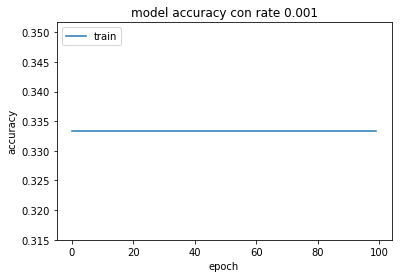

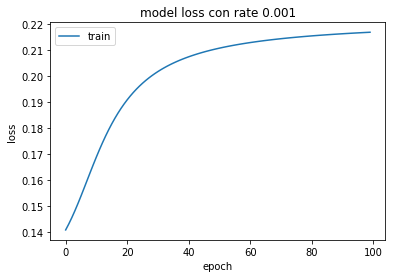

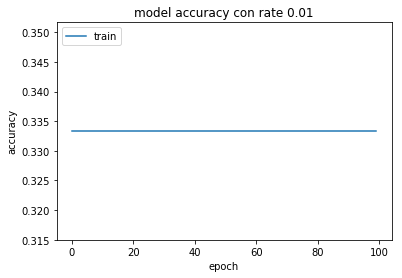

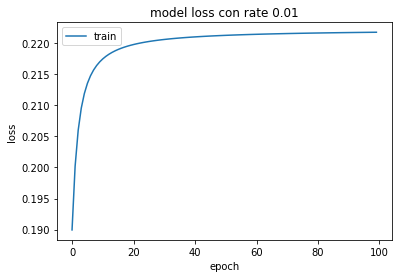

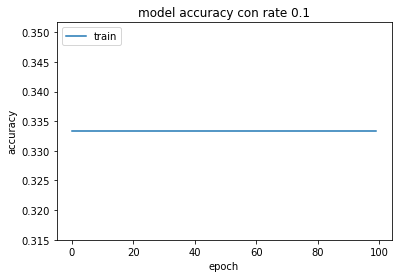

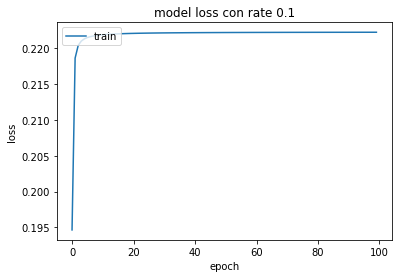

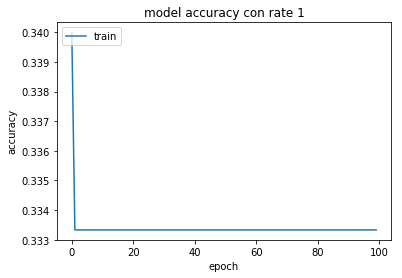

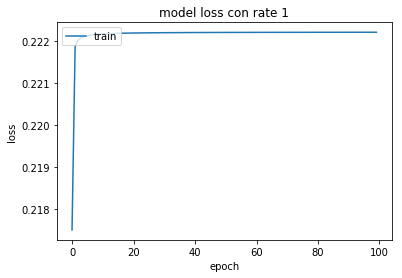

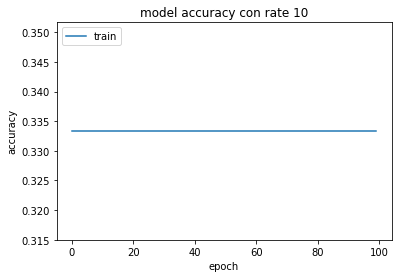

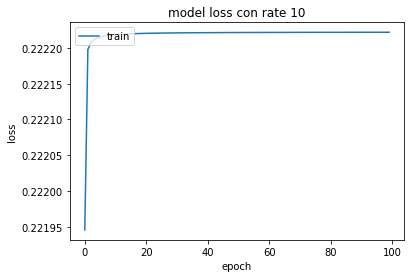

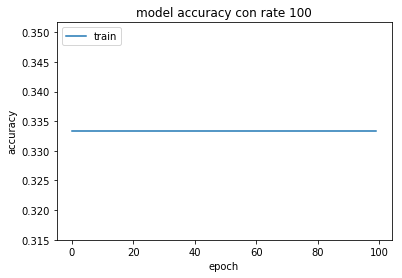

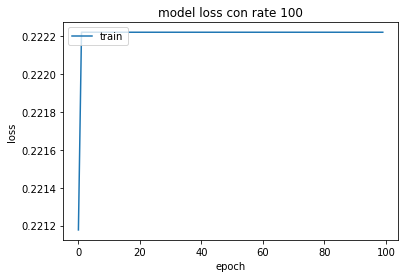

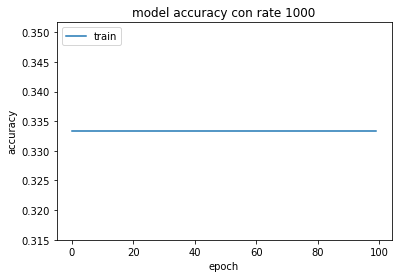

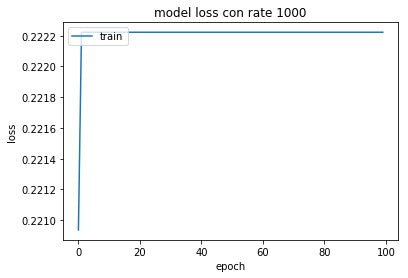

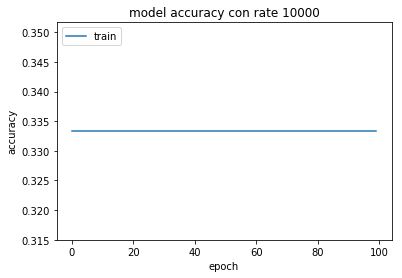

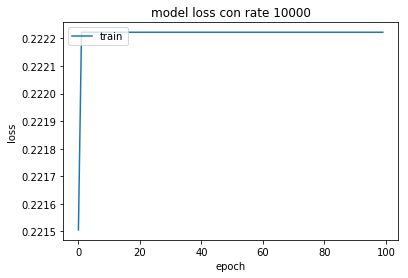

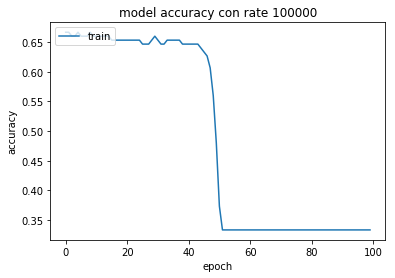

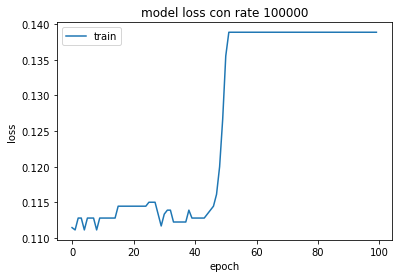

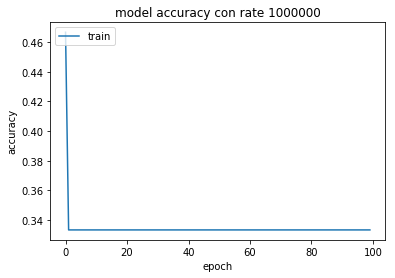

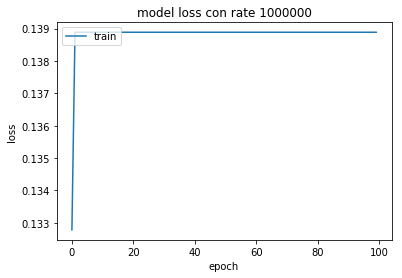

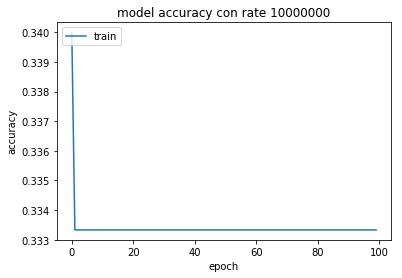

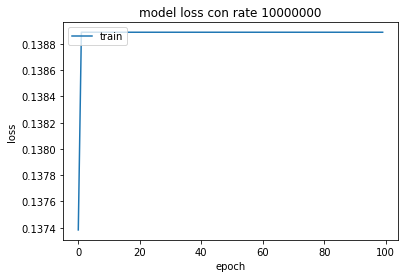

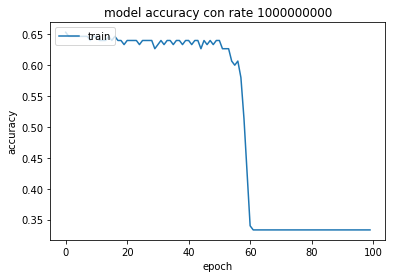

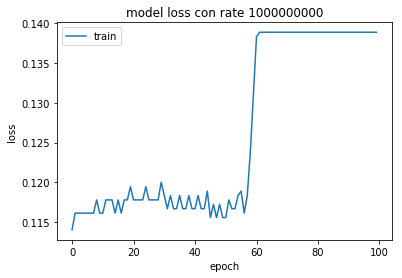

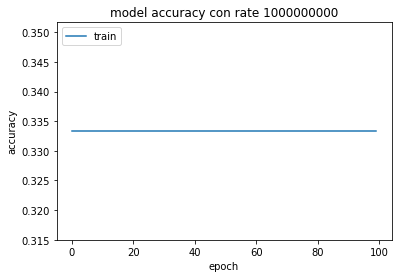

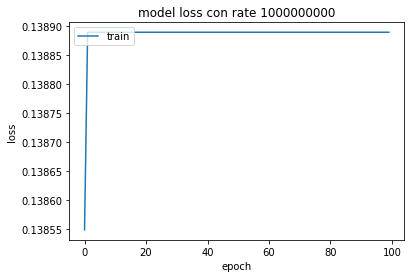

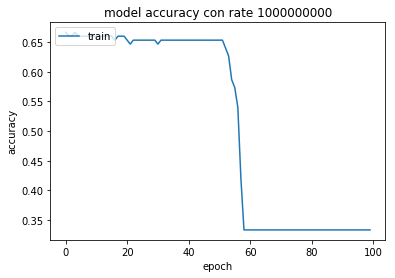

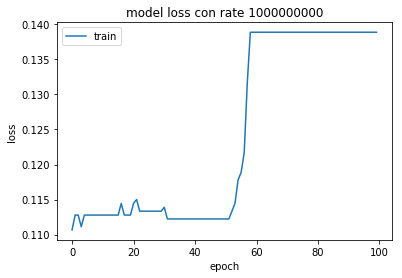

In [29]:
#para probar learning rate:
rates=[0.001, 0.01, 0.1, 1 , 10, 100, 1000, 
       10000, 100000,1000000,10000000, 
       1000000000, 1000000000, 1000000000]

for rate in rates:

    arquitectura=size_layers(3,4,32,16,3)
    modelo=NN_2ocultas(3, arquitectura)
    errores,accs = modelo.entrenamiento(X_train,y_onehot, "sigmoid", rate, "mse","grad",0)

    promerr=[]
    promacc=[]
    #calculo de los promedios por epoch
    for i in range(len(errores)):
        prome=np.mean(errores[i])
        proma=np.mean(accs[i])
        promerr.append(prome)
        promacc.append(proma)
        
    # Grafico para el accuracy
    import matplotlib.pyplot as plt
    plt.plot(promacc)
    plt.title('model accuracy con rate '+str(rate))
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train'], loc='upper left')
    plt.show()

    # Grafico para el Loss
    plt.plot(promerr)
    plt.title('model loss con rate '+str(rate))
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train'], loc='upper left')
    plt.show()


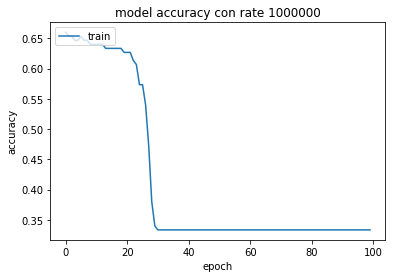

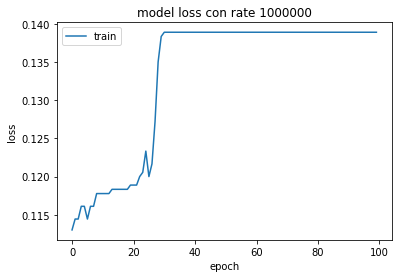

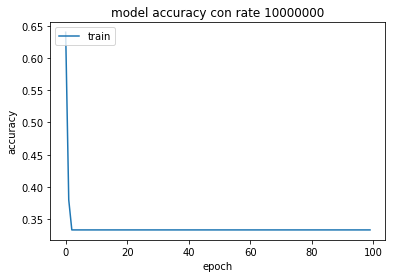

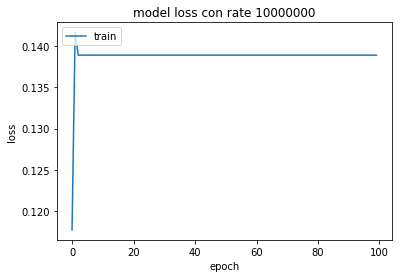

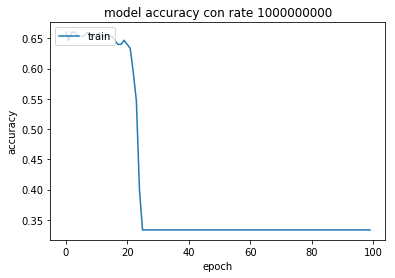

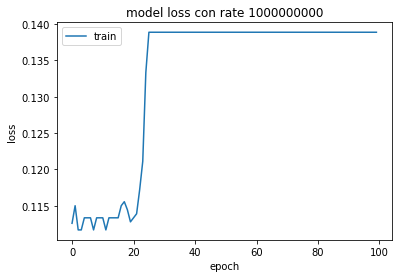

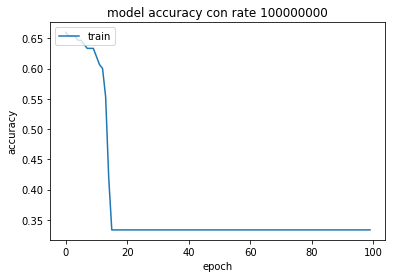

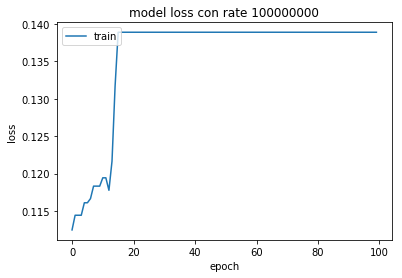

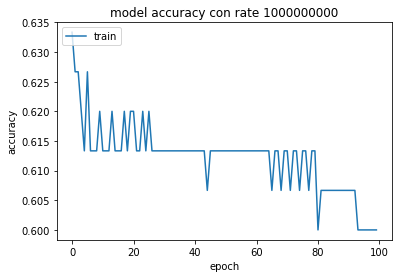

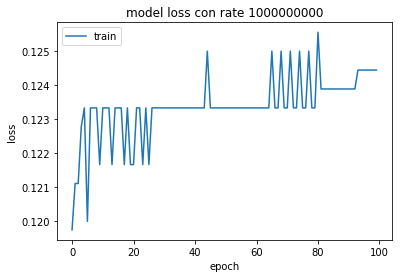

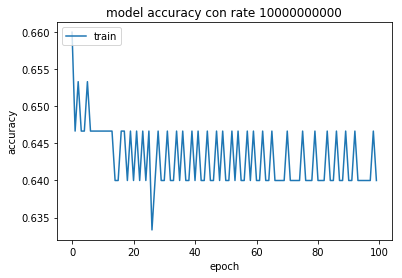

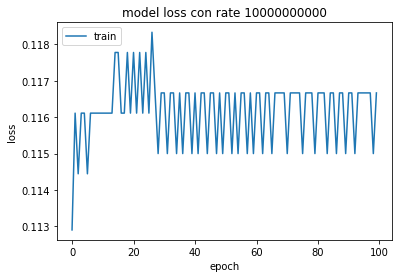

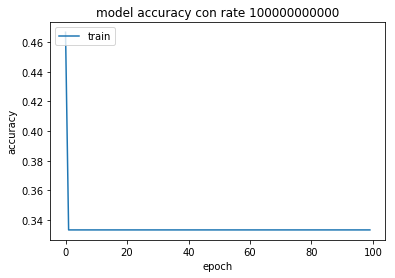

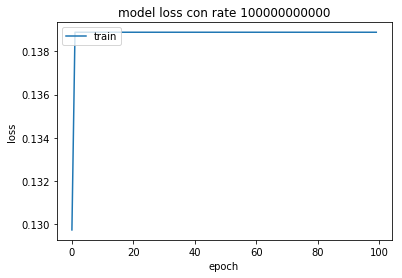

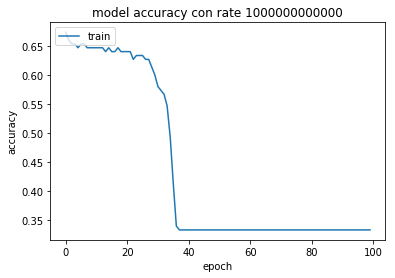

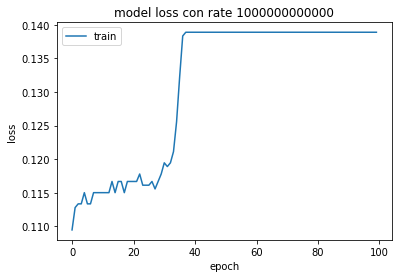

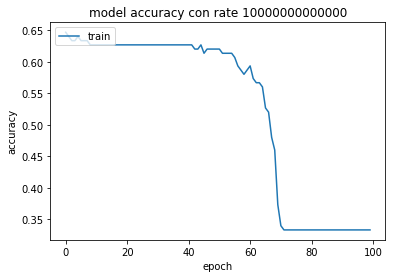

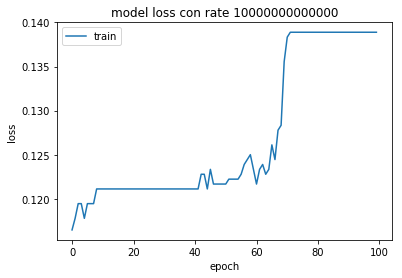

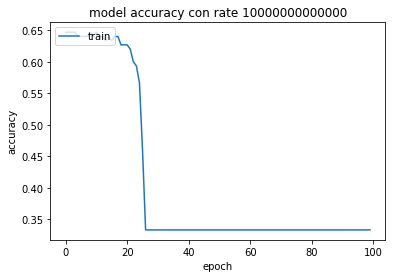

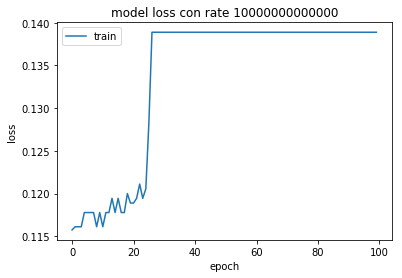

In [30]:
#para probar learning rate:
rates=[1000000,10000000, 1000000000, 
       100000000, 1000000000, 10000000000,
       100000000000,1000000000000,
       10000000000000,10000000000000]

for rate in rates:

    arquitectura=size_layers(3,4,32,16,3)
    modelo=NN_2ocultas(3, arquitectura)
    errores,accs = modelo.entrenamiento(X_train,y_onehot, "sigmoid", rate, "mse","grad",0)

    promerr=[]
    promacc=[]
    #calculo de los promedios por epoch
    for i in range(len(errores)):
        prome=np.mean(errores[i])
        proma=np.mean(accs[i])
        promerr.append(prome)
        promacc.append(proma)
    # Grafico para el accuracy
    import matplotlib.pyplot as plt
    plt.plot(promacc)
    plt.title('model accuracy con rate '+str(rate))
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    #plt.legend(['train', 'test'], loc='upper left')
    plt.legend(['train'], loc='upper left')
    plt.show()

    # Grafico para el Loss
    plt.plot(promerr)
    plt.title('model loss con rate '+str(rate))
    plt.ylabel('loss')
    plt.xlabel('epoch')
    #plt.legend(['train', 'test'], loc='upper left')
    plt.legend(['train'], loc='upper left')
    plt.show()


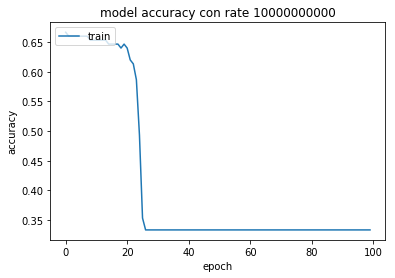

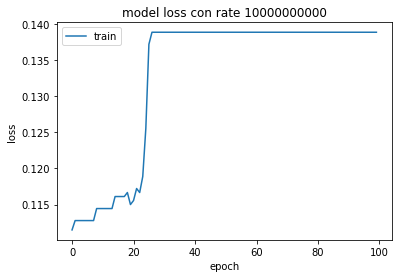

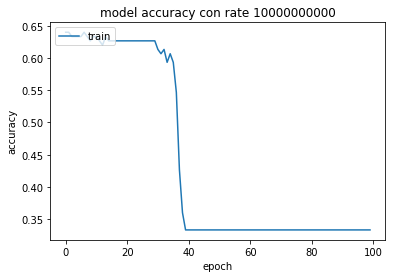

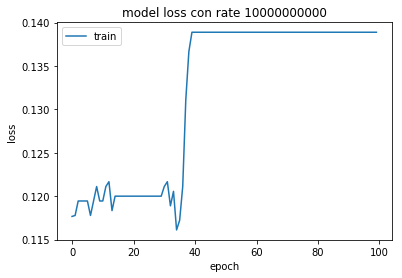

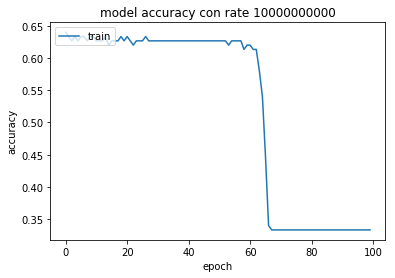

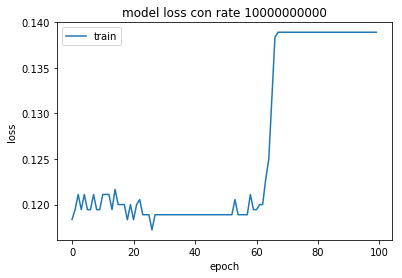

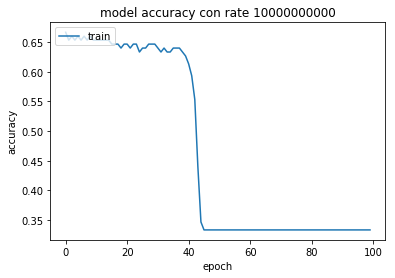

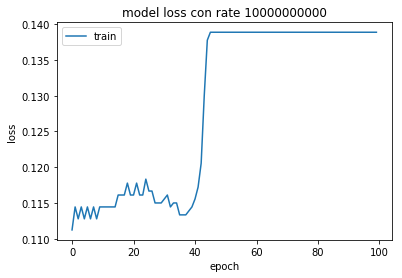

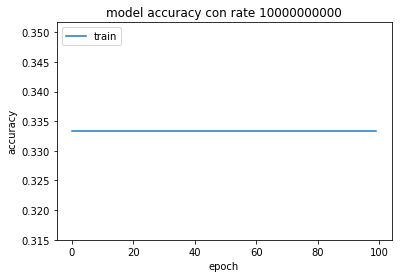

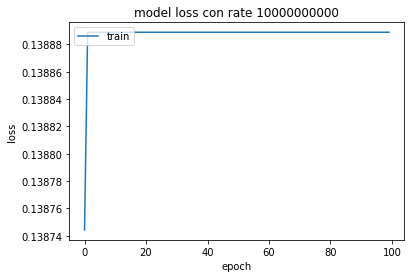

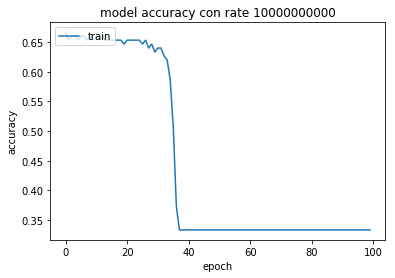

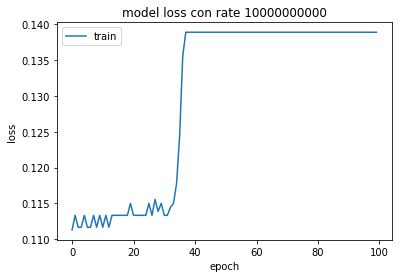

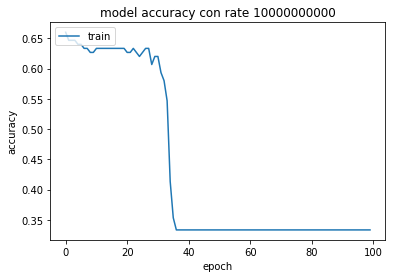

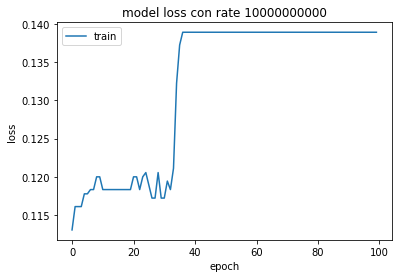

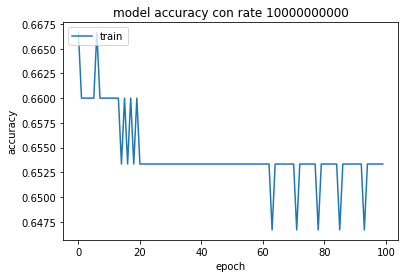

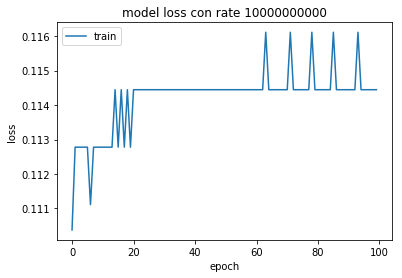

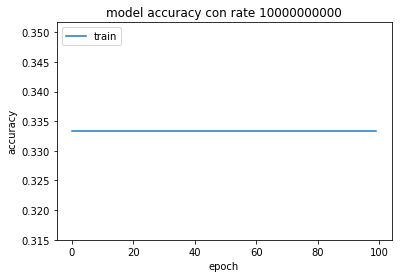

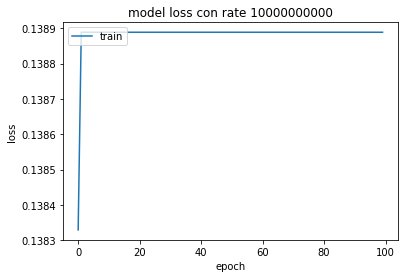

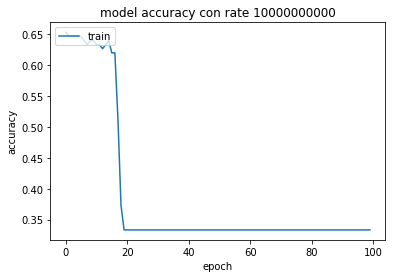

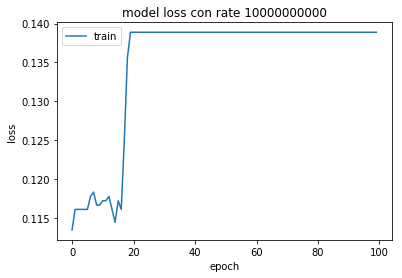

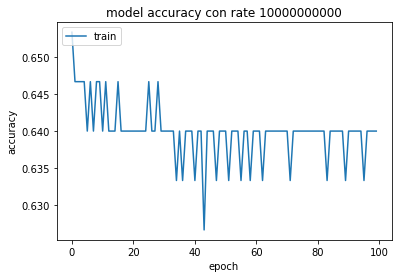

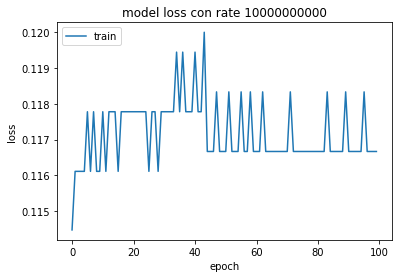

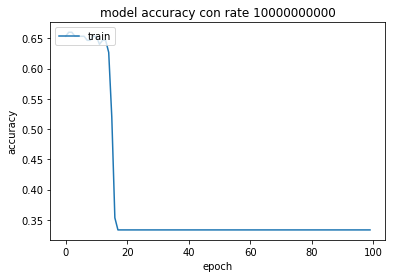

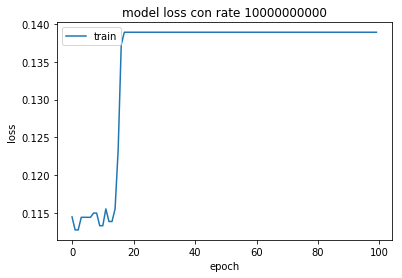

In [47]:
rates=[10000000000,10000000000,10000000000,
       10000000000,10000000000,10000000000,
       10000000000,10000000000,10000000000,
       10000000000,10000000000,10000000000]

for rate in rates:

    arquitectura=size_layers(3,4,32,16,3)
    modelo=NN_2ocultas(3, arquitectura)
    errores,accs = modelo.entrenamiento(X_train,y_onehot, "sigmoid", rate, "mse","grad",0)

    promerr=[]
    promacc=[]
    #calculo de los promedios por epoch
    for i in range(len(errores)):
        prome=np.mean(errores[i])
        proma=np.mean(accs[i])
        promerr.append(prome)
        promacc.append(proma)
        
    # Grafico para el accuracy
    import matplotlib.pyplot as plt
    plt.plot(promacc)
    plt.title('model accuracy con rate '+str(rate))
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    #plt.legend(['train', 'test'], loc='upper left')
    plt.legend(['train'], loc='upper left')
    plt.show()

    # Grafico para el Loss
    plt.plot(promerr)
    plt.title('model loss con rate '+str(rate))
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train'], loc='upper left')
    plt.show()

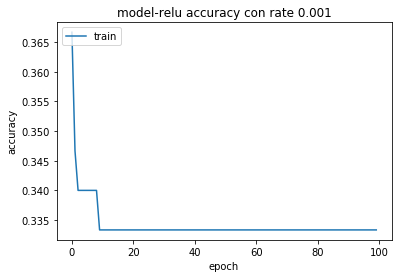

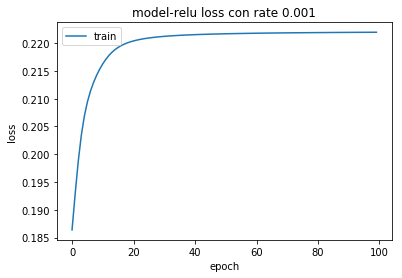

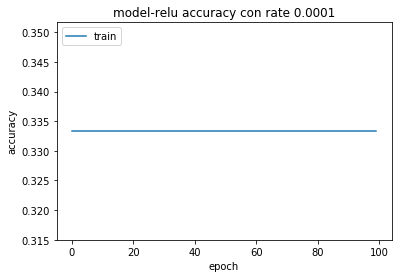

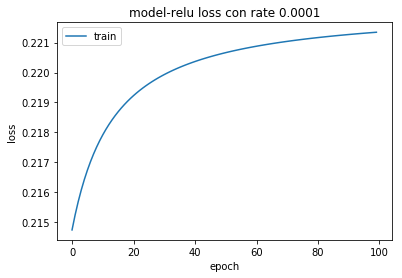

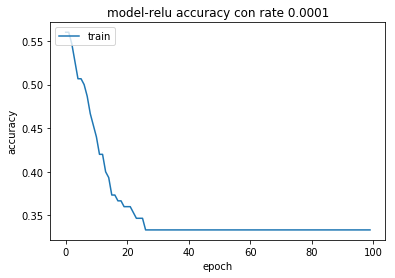

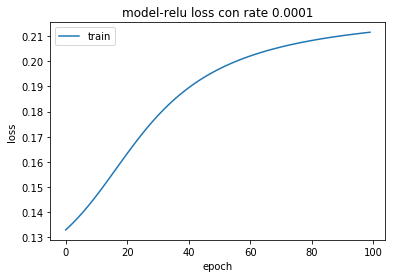

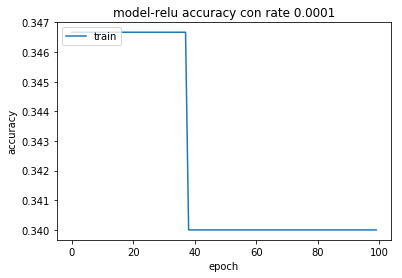

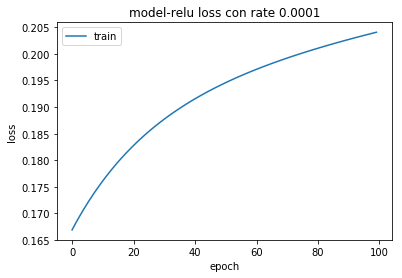

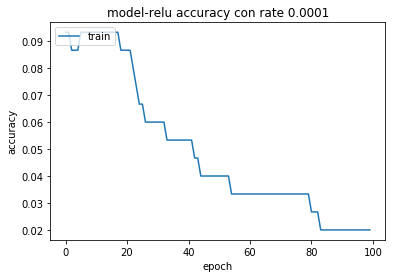

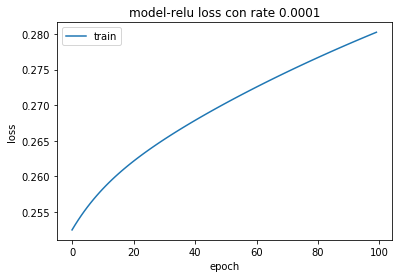

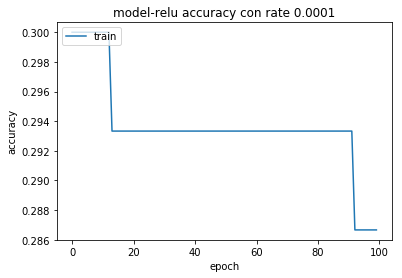

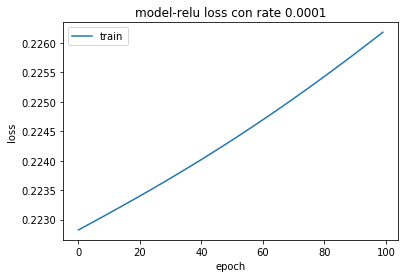

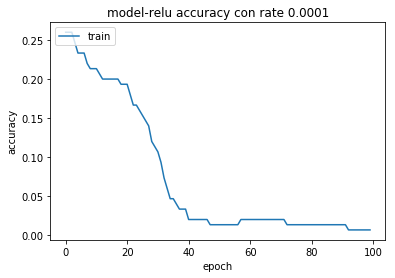

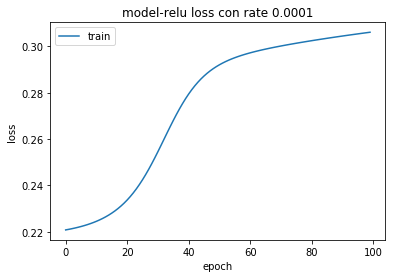

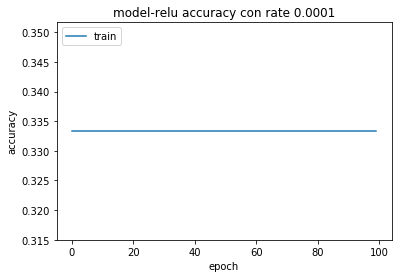

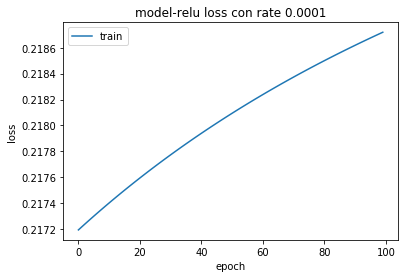

In [49]:
#para probar learning rate:
rates=[0.001,0.0001,
       0.0001,0.0001,
       0.0001,0.0001,
       0.0001,0.0001]

for rate in rates:

    arquitectura=size_layers(3,4,32,16,3)
    modelo=NN_2ocultas(3, arquitectura)
    errores,accs = modelo.entrenamiento(X_train,y_onehot, "relu", rate, "mse","grad",0)

    promerr=[]
    promacc=[]
    #calculo de los promedios por epoch
    for i in range(len(errores)):
        prome=np.mean(errores[i])
        proma=np.mean(accs[i])
        promerr.append(prome)
        promacc.append(proma)
    # Grafico para el accuracy
    import matplotlib.pyplot as plt
    plt.plot(promacc)
    plt.title('model-relu accuracy con rate '+str(rate))
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train'], loc='upper left')
    plt.show()

    # Grafico para el Loss
    plt.plot(promerr)
    plt.title('model-relu loss con rate '+str(rate))
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train'], loc='upper left')
    plt.show()


<a id="segundo"></a>
### 2. Comparar back-propagation (BP) de Keras

Keras es una de las librerı́as más populares para desarrollar nuevos modelos de redes neuronales o implementar eficientemente modelos conocidos con fines prácticos, puesto que ofrece una interfaz para poder trabajar de una manera mucho mas simple además de permitir también el manejo de configuraciones mas específicas.  
Como actividad pedagógica ahora se les pide comparar el algoritmo implementado por ustedes con el de alto nivel de la librería __[keras](https://keras.io/)__ . Se les pedirá comparar sobre el mismo dataset con la misma arquitectura utilizada anteriormente, es decir, dos capas ocultas (con 32 y 16 neuronas respectivamente), 3 neuronas en la capa de salida con función de activación softmax, optimizador Gradiente Descentente (GD) con tasa de aprendizaje fija.

<img src="https://i.imgur.com/hUjFUDU.png" width="40%" height="40%" />


> a) Defina, a través de la interfaz de keras, la arquitectura de la red, con las funciones de activación para comparar con la sección anterior.
```python
from keras.models import Sequential
from keras.layers.core import Dense
model = Sequential()
model.add(Dense(32, input_dim=X_train.shape[1], activation="sigmoid or relu"))
model.add(Dense(16, activation="sigmoid or relu"))
model.add(Dense(3, activation="softmax"))
```

> b) Defina, a través de la interfaz de keras, el optimizador de la red, en conjunto con la función de error, para poder comparar con la sección anterior.
```python
from keras.optimizers import SGD
model.compile(optimizer=SGD(lr=0.1),loss="categorical_crossentropy or mse", metrics=["accuracy"])
```

> c) Entrene (ajuste) los pesos de la red definida mediante keras, reportando los mismos gráficos de la sección anterior para poder comparar. Si hay diferencias en la convergencia del algoritmo ¿A qué podría deverse? si hay una gran diferencia en los tiempos de entrenamiento ¿A qué podría deverse?
```python
model.fit(X_train, y_onehot, epochs=100, batch_size=1, verbose=1)
```

Epoch 1/100
150/150 [==============================] - 1s 10ms/step - loss: 0.9997 - acc: 0.4867
Epoch 2/100
150/150 [==============================] - 0s 1ms/step - loss: 0.5293 - acc: 0.7600
Epoch 3/100
150/150 [==============================] - 0s 1ms/step - loss: 0.3606 - acc: 0.8667
Epoch 4/100
150/150 [==============================] - 0s 1ms/step - loss: 0.2695 - acc: 0.9133
Epoch 5/100
150/150 [==============================] - 0s 1ms/step - loss: 0.2044 - acc: 0.9133
Epoch 6/100
150/150 [==============================] - 0s 1ms/step - loss: 0.1674 - acc: 0.9600
Epoch 7/100
150/150 [==============================] - 0s 1ms/step - loss: 0.1486 - acc: 0.9533
Epoch 8/100
150/150 [==============================] - 0s 1ms/step - loss: 0.1151 - acc: 0.9800
Epoch 9/100
150/150 [==============================] - 0s 1ms/step - loss: 0.1076 - acc: 0.9667
Epoch 10/100
150/150 [==============================] - 0s 1ms/step - loss: 0.1007 - acc: 0.9667
Epoch 11/100
150/150 [================

150/150 [==============================] - 0s 1ms/step - loss: 0.0509 - acc: 0.9800
Epoch 70/100
150/150 [==============================] - 0s 1ms/step - loss: 0.0491 - acc: 0.9867
Epoch 71/100
150/150 [==============================] - 0s 1ms/step - loss: 0.0574 - acc: 0.9800
Epoch 72/100
150/150 [==============================] - 0s 1ms/step - loss: 0.0478 - acc: 0.9800
Epoch 73/100
150/150 [==============================] - 0s 1ms/step - loss: 0.0462 - acc: 0.9800
Epoch 74/100
150/150 [==============================] - 0s 1ms/step - loss: 0.0592 - acc: 0.9667
Epoch 75/100
150/150 [==============================] - 0s 1ms/step - loss: 0.0489 - acc: 0.9733
Epoch 76/100
150/150 [==============================] - 0s 1ms/step - loss: 0.0463 - acc: 0.9867
Epoch 77/100
150/150 [==============================] - 0s 1ms/step - loss: 0.0466 - acc: 0.9933
Epoch 78/100
150/150 [==============================] - 0s 1ms/step - loss: 0.0561 - acc: 0.9667
Epoch 79/100
150/150 [=====================

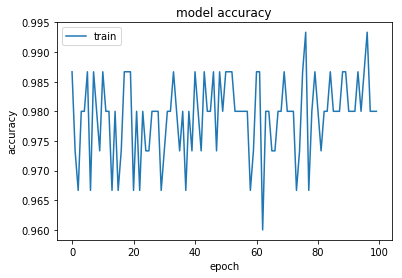

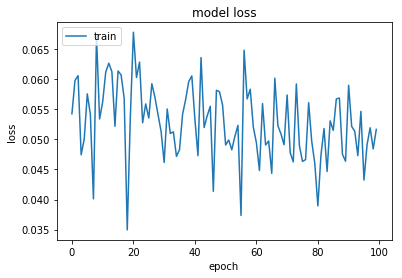

In [57]:
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_iris
X_train,y_train = load_iris(return_X_y=True)
scaler = StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)
import keras
y_onehot = keras.utils.to_categorical(y_train)



from keras.models import Sequential
from keras.layers.core import Dense
model = Sequential()
model.add(Dense(32, input_dim=X_train.shape[1], activation="sigmoid"))
model.add(Dense(16, activation="sigmoid"))
model.add(Dense(3, activation="softmax"))

from keras.optimizers import SGD
model.compile(optimizer=SGD(lr=0.1),loss="categorical_crossentropy", metrics=["accuracy"])

model.fit(X_train, y_onehot, epochs=100, batch_size=1, verbose=1)

#C
history = model.fit(X_train, y_onehot, epochs=100, batch_size=1, verbose=1)

# Los datos que estan en el history 
print(history.history.keys())

# Grafico para el accuracy
import matplotlib.pyplot as plt
plt.plot(history.history['acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper left')
plt.show()

# Grafico para el Loss
plt.plot(history.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper left')
plt.show()


<a id="tercero"></a>
### 3. Verificación numérica del gradiente para una componente

En esta sección deberá verificar numéricamente el gradiente para los parámetros del modelo (que en este caso son los pesos de la red), que hasta ahora a definido de manera analítica en su programa, por ejemplo la derivada de $x^2$ es $2x$. Ahora deberá verificar estos cálculos usando la definición de gradiente.

$$ \nabla_{w} Loss = \lim_{\epsilon \rightarrow 0} \frac{Loss(w+ \epsilon)-Loss(w)}{\epsilon} $$

Debido a que el *forward propagation* es relativamente fácil de implementar, se puede confiar en que se realizó de manera correcta, por lo que el cómputo del error (*loss*) debería ser correcto. Esto significa que podemos verificar el gradiente o la derivada analítica del error $\frac{\partial Loss}{\partial w}$ comprobando que el resultado obtenido es similar (dentro de una tolerancia numérica, por ejemplo $10^6$) al valor que obtenemos aplicando la fórmula anterior. Naturalmente interpretaremos $\lim_{\epsilon \rightarrow 0}$ como un valor "*suficientemente pequeño*" de $\epsilon$.


> a) Para un peso escogido aleatoriamente entre la primera capa de la red (*input*) y la primera capa oculta, calcule el valor del gradiente de la función de error para ambas funciones utilizadas (ayúdese mediante las funciones de *backward pass* implementadas anteriormente), luego compare y verifique con el valor numérico del gradiente mediante el procedimiento explicado anteriormente.

> b) Vuelva a verificar el valor del gradiente para otros dos pesos escodigos aleatoriamente en la primera operación de la red. Compare y concluya.

In [27]:
#Se hace un forward y una backward, se obtiene dE/dw, se hace guarda el L original, sobre los mismos pesos pero con uno alterado
#se tiene que hacer un forward para tener L(w+e) y verificar el limite

m_pesos_originales=[]

from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_iris
X_train,y_train = load_iris(return_X_y=True)
scaler = StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)
X_ejemplo=X_train[0]

import keras
y_onehot = keras.utils.to_categorical(y_train)
Y_ejemplo=y_onehot[0]

eps=1e-8
arquitectura=size_layers(3,4,32,16,3)
dw_v=[]
lim_v=[]
for i in range(100):
    modelo=NN_2ocultas(3, arquitectura)
    m_pesos_originales = modelo.m_pesos.copy()
    error,acc=modelo.training(X_ejemplo,Y_ejemplo,1,"ce","relu", 0.1,"grad",0, 0.1)
    DE_Dw00 = modelo.e_m_pesos[0][0][0]
    dw_v.append(DE_Dw00)
    
    m_pesos_originales[0][0][0]+=eps 
    modelo2=NN_2ocultas(3, arquitectura)
    modelo2.m_pesos= m_pesos_originales.copy()
    error2,acc2=modelo2.training(X_ejemplo,Y_ejemplo,1,"ce","relu", 0.1,"grad",0, 0.1)
    limite = (error2-error)/eps
    lim_v.append(limite)

print("dE/dw_v = ",dw_v)
print("limite = ",lim_v)


dE/dw_v =  [-0.013811570481028147, 0.014336548489992509, 0.013210435104940226, -0.0025938960165905601, -0.089654914248964934, -0.022321691478477707, -0.018881550163799079, -0.11982752904088097, -0.49716938216078288, 0.061229124011033052, -0.11402898010752743, -0.046961010352745601, -0.0081697189468454678, -0.30537592154660786, -0.2097539916174587, -0.00063415820273626984, -0.1994135669440604, -0.00099777276193751944, 0.0093714545100776012, -0.026337666282843765, -0.00083242310553124856, 0.010244833640259068, 0.016814648122543671, 0.020645352663489693, -0.30998465688294902, -0.28479771062507248, 0.00072835904853770254, 0.0031675249561453288, 0.0022908170273182363, -0.07817868262326591, -0.042491132119194724, 0.0035714371496576537, -0.56041034491768804, 0.011127393436247229, -0.32888642763152937, -0.02465391616906127, -0.0242964053825519, -0.040866035968604539, -0.034293203335252875, -0.24072210922614573, -0.019646414774220789, 0.0065221131774831752, 3.4322613256423197e-05, -0.0364552665

<a id="cuarto"></a>
### 4. Implementar *momentum* como variante

En esta sección deberá construir, sin usar librerı́as, excepto eventualmente *numpy* para implementar operaciones básicas de algebra lineal, una variante del programa definido anteriormente ([sección 1](#primero)) que entrene la red utilizando *momentum* clásico.

$$ v^{(t+1)} \leftarrow \mu v^{(t)} - \eta \nabla_{w^{(t)}} Loss \\
w^{(t+1)} \leftarrow w^{(t)} + v^{(t+1)}
$$

> *Sutskever, I., Martens, J., Dahl, G., & Hinton, G. (2013, February). On the importance of initialization and momentum in deep learning. In International conference on machine learning (pp. 1139-1147).*


Demuestre que su programa funciona en el mismo problema de clasificación presentado anteriormente, para esto, además deberá construir un gráfico de la función de error o pérdida (*loss*) *vs* el número de *epochs* y comentar/analizar la convergencia. ¿Es una mejora significativa? 

In [ ]:
def backwarding_momentum(total_capas, vector_x, vector_y, tipo_error ,tasa, salida_l, da_salida_l,e_salida_l,m_pesos, vector_arquit,e_m_pesos, mu, momentums):
    #inicializacion de momentum (vector de largo 16 compuesto por zeros)
    if tipo_error=="mse":
        error_EA=d_error_mse(vector_y,salida_l[-2])
    else:
        error_EA=d_error_CE(vector_y,salida_l[-2])  
    momentum_capa=momentums[total_capas-1].T.copy()    #v_t
    #print ("momentum antes de for", momentum_capa)
    for neurona_final in range(vector_arquit[-1]):
        error_EW_n=error_EA[neurona_final]*da_salida_l[-2][neurona_final]*np.array(salida_l[-3])
        e_m_pesos_T=e_m_pesos[total_capas-1].T.copy()
        e_m_pesos_T[neurona_final]=error_EW_n.copy()
        e_m_pesos[total_capas-1] = e_m_pesos_T.T.copy()    
        #print ("mu*momentum[neurona_final]", mu*momentum_capa[neurona_final] )
        #print ("- tasa*gradiente", -(tasa*error_EW_n))
        momentum= mu*momentum_capa[neurona_final]-(tasa*error_EW_n)    #v_t+1=mu*v_t - n*Grad 
        #print ("momentums[total_capas-1].T", momentums[total_capas-1].T)
        momentums[total_capas-1].T[neurona_final]=momentum.copy() #v_t+1=mu*v_t - n*Grad in place
        #correccion vector de pesos-matriz final correspondiente a la neurona
        pesos_auxiliar=m_pesos[total_capas-1].T.copy()
        pesos_auxiliar[neurona_final]= pesos_auxiliar[neurona_final].copy()+momentum.copy() 
        m_pesos[total_capas-1]=pesos_auxiliar.T.copy()            #actualizacion in place
    e_salida_l[total_capas-1]=error_EA.copy()                     #es el triangulo (Delta mayus.)        
    #backwarding de capas ocultas y capa input
    #corrección de pesos que debiese ser por batch         
    for capa in np.arange(total_capas-2,-1,-1):                   #se mueve en capa 1 y 0
        error_EA_s=np.sum(e_salida_l[capa+1])                     #suma el vector EA calculado en la capa 2 (igual para todos)
        error_aux=[]
        pesos_auxiliar2=m_pesos[capa].T.copy() #se hace (16x32 la matriz)
        momentum_capa=momentums[capa].T.copy()    #v_t
        for neurona in range(vector_arquit[capa+1]):
            error_EW_s=error_EA_s*da_salida_l[capa][neurona]*np.array(salida_l[capa-1])
            e_m_pesos[capa].T[neurona]=error_EW_s.copy()
            #corregir pesos           
            momentum= mu*momentum_capa[neurona]-(tasa*error_EW_s) 
            momentums[capa].T[neurona]=momentum.copy()            
            arreglo=(pesos_auxiliar2[neurona].copy()+momentum.copy()).copy() #(vector de 32)
            pesos_auxiliar2[neurona]=arreglo.copy()  #se hace
            m_pesos[capa]=pesos_auxiliar2.T.copy()  
            error_aux.append(error_EA_s.copy())
        e_salida_l[capa]=error_aux.copy()

    return m_pesos,e_m_pesos

### Con reinicio de momentum por epoch

In [ ]:
arquitectura=size_layers(3,4,32,16,3) #(3,4,32,16,3)
modelo2=NN_2ocultas(3, arquitectura)
#print ("MPESOS ORIGINAL",modelo2.m_pesos)
print (X_train.shape[0])
errores,accs = modelo2.entrenamiento(arquitectura,X_train,y_onehot, "sigmoid", 0.1, "momentum",1, 0.1) 
#modelo.entrenamiento(x,y,f_activ,tasa_aprend,tipo_backprop,bool_reinicio,tasa_momentum) 

promerr=[]
promacc=[]
#calculo de los promedios por epoch
for i in range(len(errores)):
    prome=np.mean(errores[i])
    proma=np.mean(accs[i])
    promerr.append(prome)
    promacc.append(proma)

print ("MPESOS FINAL",modelo.m_pesos)

In [ ]:
# Grafico para el accuracy
import matplotlib.pyplot as plt
plt.plot(promacc)
plt.title('model accuracy 2')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train'], loc='lower right')
plt.show()

# Grafico para el Loss
plt.plot(promerr)
plt.title('model loss 2')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train'], loc='lower right')
plt.show()

### Sin reinicio de momentum por epoch


In [ ]:
arquitectura=size_layers(3,4,32,16,3) #(3,4,32,16,3)
modelo2=NN_2ocultas(3, arquitectura)
#print ("MPESOS ORIGINAL",modelo2.m_pesos)
print (X_train.shape[0])
errores,accs = modelo2.entrenamiento(arquitectura,X_train,y_onehot, "sigmoid", 0.1, "momentum",0, 0.1) 
#modelo.entrenamiento(x,y,f_activ,tasa_aprend,tipo_backprop,bool_reinicio,tasa_momentum) 

promerr=[]
promacc=[]
#calculo de los promedios por epoch
for i in range(len(errores)):
    prome=np.mean(errores[i])
    proma=np.mean(accs[i])
    promerr.append(prome)
    promacc.append(proma)

print ("MPESOS FINAL",modelo.m_pesos)

In [ ]:
# Grafico para el accuracy
import matplotlib.pyplot as plt
plt.plot(promacc)
plt.title('model accuracy 3')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train'], loc='lower right')
plt.show()

# Grafico para el Loss
plt.plot(promerr)
plt.title('model loss 3')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train'], loc='lower right')
plt.show()